In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('/kaggle/input/donnes-ventes/donnes_ventes.csv')

In [2]:
import pandas as pd

# Load the data
df1 = pd.read_csv('/kaggle/input/predictionset/donnees_ventes_4.csv')

In [3]:
# Get unique stations
unique_stations = df['Station'].unique()

# Create a mapping from old station IDs to new numeric IDs
station_mapping = {station: i+1 for i, station in enumerate(unique_stations[:10])}

# If you have more than 10 unique stations, you might need to handle them differently
print("Station mapping:", station_mapping)


Station mapping: {1249949532: 1, 1546539305: 2, -759695236: 3, 1879002950: 4, 1515917910: 5, 138698241: 6, -1210215687: 7, 1079293707: 8, 358751465: 9, 909091379: 10}


In [4]:
# Apply the mapping to the 'Station' column
df['Station'] = df['Station'].map(station_mapping)

# Check the results
print(df['Station'].unique())


[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
# Define the station mapping exactly as you want it
station_mapping = {
    1249949532: 1,
    1546539305: 2,
    -759695236: 3,
    1879002950: 4,
    1515917910: 5,
    138698241: 6,
    -1210215687: 7,
    1079293707: 8,
    358751465: 9,
    909091379: 10
}

# Print the station mapping
print("Station mapping:", station_mapping)

# Apply the mapping to the 'Station' column
df1['Station'] = df1['Station'].map(station_mapping)

# Check the results
print(df1['Station'].unique())

Station mapping: {1249949532: 1, 1546539305: 2, -759695236: 3, 1879002950: 4, 1515917910: 5, 138698241: 6, -1210215687: 7, 1079293707: 8, 358751465: 9, 909091379: 10}
[ 2  6  1  5  4  7  3  9  8 10]


In [6]:
# Ensure 'DateTransaction' is in datetime format
df['DateTransaction'] = pd.to_datetime(df['DateTransaction'])

# Extract the date part of DateTransaction
df['DateOnly'] = df['DateTransaction'].dt.date

# Extract date features
df['Year'] = df['DateTransaction'].dt.year
df['Month'] = df['DateTransaction'].dt.month
df['Day'] = df['DateTransaction'].dt.day
df['Hour'] = df['DateTransaction'].dt.hour
df['Minute'] = df['DateTransaction'].dt.minute
df['Second'] = df['DateTransaction'].dt.second
df['DayOfWeek'] = df['DateTransaction'].dt.dayofweek
df['DayOfYear'] = df['DateTransaction'].dt.dayofyear
df['WeekOfYear'] = df['DateTransaction'].dt.isocalendar().week

# Drop the original DateTransaction column if not needed
df.drop(columns=['DateTransaction'], inplace=True)

# Display the first few rows of the dataframe
df.head()


Station  TransactionNumber  Pump  Product  TransactionVolume  \
0        1               7982     3        1               0.65   
1        2               9914     7        1               0.99   
2        2                123     6        2              14.30   
3        2               6157     5        2              14.56   
4        1               9636    13        2              39.63   

   TransactionPrice    DateOnly  Year  Month  Day  Hour  Minute  Second  \
0             10.00  2023-10-16  2023     10   16     0      18      18   
1             15.00  2023-08-16  2023      8   16    15      12      15   
2            200.00  2023-11-23  2023     11   23    14      30      14   
3            200.00  2023-09-25  2023      9   25    17      31      52   
4            550.06  2023-01-04  2023      1    4    11      13      41   

   DayOfWeek  DayOfYear  WeekOfYear  
0          0        289          42  
1          2        228          33  
2          3        327          47  
3          0        268          39  
4          2          4           1

In [7]:
# Ensure 'DateTransaction' is in datetime format
df1['DateTransaction'] = pd.to_datetime(df1['DateTransaction'])

# Extract the date part of DateTransaction
df1['DateOnly'] = df1['DateTransaction'].dt.date

# Extract date features
df1['Year'] = df1['DateTransaction'].dt.year
df1['Month'] = df1['DateTransaction'].dt.month
df1['Day'] = df1['DateTransaction'].dt.day
df1['Hour'] = df1['DateTransaction'].dt.hour
df1['Minute'] = df1['DateTransaction'].dt.minute
df1['Second'] = df1['DateTransaction'].dt.second
df1['DayOfWeek'] = df1['DateTransaction'].dt.dayofweek
df1['DayOfYear'] = df1['DateTransaction'].dt.dayofyear
df1['WeekOfYear'] = df1['DateTransaction'].dt.isocalendar().week

# Drop the original DateTransaction column if not needed
df1.drop(columns=['DateTransaction'], inplace=True)

# Display the first few rows of the dataframe
df1.head()


Station  TransactionNumber  Pump  Product  TransactionVolume  \
0        2               1570     6        2              21.83   
1        6               7802     9        1               2.15   
2        1               7447     7        2              33.60   
3        1               8475     4        2              14.68   
4        1               1540    13        2              43.38   

   TransactionPrice    DateOnly  Year  Month  Day  Hour  Minute  Second  \
0            300.00  2023-10-01  2023     10    1    12       7      38   
1             30.01  2023-06-06  2023      6    6     7      52      30   
2            457.63  2023-02-03  2023      2    3     8      50      11   
3            200.00  2023-02-03  2023      2    3    17      29      35   
4            600.00  2023-11-26  2023     11   26     3       8      17   

   DayOfWeek  DayOfYear  WeekOfYear  
0          6        274          39  
1          1        157          23  
2          4         34           5  
3          4         34           5  
4          6        330          47

In [9]:
# Aggregate transaction volume for each station by day
Station_Day_Aggregation = df.groupby(['Station', 'DateOnly'])['TransactionVolume'].sum().reset_index()

# Merge aggregated data with cyclic features
# Drop duplicates to ensure unique rows
features = df[['Station', 'DateOnly',
               'Month',
               'Day',
               'DayOfWeek',
               'DayOfYear',
               'WeekOfYear']].drop_duplicates()

# Merge the aggregated transaction volume with cyclic features
df_aggregated = pd.merge(Station_Day_Aggregation, features, on=['Station', 'DateOnly'], how='left')

print(df_aggregated)

      Station    DateOnly  TransactionVolume  Month  Day  DayOfWeek  \
0           1  2022-01-01           18915.48      1    1          5   
1           1  2022-01-02           15040.02      1    2          6   
2           1  2022-01-03           21886.33      1    3          0   
3           1  2022-01-04           18649.30      1    4          1   
4           1  2022-01-05           19775.58      1    5          2   
...       ...         ...                ...    ...  ...        ...   
8906       10  2024-06-06             672.80      6    6          3   
8907       10  2024-06-07            1230.43      6    7          4   
8908       10  2024-06-08             809.80      6    8          5   
8909       10  2024-06-09            1469.93      6    9          6   
8910       10  2024-06-10               0.00      6   10          0   

      DayOfYear  WeekOfYear  
0             1          52  
1             2          52  
2             3           1  
3             4           1

In [10]:
# Aggregate transaction volume for each station by day
Station_Day_Aggregation = df1.groupby(['Station', 'DateOnly'])['TransactionVolume'].sum().reset_index()

# Merge aggregated data with cyclic features
# Drop duplicates to ensure unique rows
features = df1[['Station', 'DateOnly',
               'Month',
               'Day',
               'DayOfWeek',
               'DayOfYear',
               'WeekOfYear']].drop_duplicates()

# Merge the aggregated transaction volume with cyclic features
df_aggregated1 = pd.merge(Station_Day_Aggregation, features, on=['Station', 'DateOnly'], how='left')

print(df_aggregated1)

      Station    DateOnly  TransactionVolume  Month  Day  DayOfWeek  \
0           1  2023-01-01           29737.21      1    1          6   
1           1  2023-01-02           40177.30      1    2          0   
2           1  2023-01-03           38395.26      1    3          1   
3           1  2023-01-04           36586.46      1    4          2   
4           1  2023-01-05           35959.38      1    5          3   
...       ...         ...                ...    ...  ...        ...   
5886       10  2024-08-08            1365.88      8    8          3   
5887       10  2024-08-09            1766.66      8    9          4   
5888       10  2024-08-10            1125.18      8   10          5   
5889       10  2024-08-11             917.68      8   11          6   
5890       10  2024-08-12             269.58      8   12          0   

      DayOfYear  WeekOfYear  
0             1          52  
1             2           1  
2             3           1  
3             4           1

In [11]:
import pandas as pd

# Ensure 'DateOnly' is in datetime format
df_aggregated['DateOnly'] = pd.to_datetime(df_aggregated['DateOnly'])
df_aggregated1['DateOnly'] = pd.to_datetime(df_aggregated1['DateOnly'])

# Define the date range
start_date = pd.Timestamp('2024-05-01')
end_date = pd.Timestamp('2024-06-10')

# Filter df_aggregated1 for the date range
filtered_df1 = df_aggregated1[(df_aggregated1['DateOnly'] >= start_date) & (df_aggregated1['DateOnly'] <= end_date)]

# Filter df_aggregated for the date range
filtered_df = df_aggregated[(df_aggregated['DateOnly'] >= start_date) & (df_aggregated['DateOnly'] <= end_date)]

# Remove the rows in df_aggregated that are in the date range
df_aggregated_updated = df_aggregated[~df_aggregated.index.isin(filtered_df.index)]

# Concatenate the updated rows with the new rows from df_aggregated1
df_aggregated_combined = pd.concat([df_aggregated_updated, filtered_df1], ignore_index=True)

# Sort the combined DataFrame by 'Station' and 'DateOnly'
df_aggregated_combined = df_aggregated_combined.sort_values(by=['Station', 'DateOnly']).reset_index(drop=True)

print(df_aggregated_combined)


      Station   DateOnly  TransactionVolume  Month  Day  DayOfWeek  DayOfYear  \
0           1 2022-01-01           18915.48      1    1          5          1   
1           1 2022-01-02           15040.02      1    2          6          2   
2           1 2022-01-03           21886.33      1    3          0          3   
3           1 2022-01-04           18649.30      1    4          1          4   
4           1 2022-01-05           19775.58      1    5          2          5   
...       ...        ...                ...    ...  ...        ...        ...   
8906       10 2024-06-06             700.55      6    6          3        158   
8907       10 2024-06-07            1333.33      6    7          4        159   
8908       10 2024-06-08             809.80      6    8          5        160   
8909       10 2024-06-09            1672.28      6    9          6        161   
8910       10 2024-06-10            1051.92      6   10          0        162   

      WeekOfYear  
0       

In [12]:
df_aggregated_combined.head()

Station   DateOnly  TransactionVolume  Month  Day  DayOfWeek  DayOfYear  \
0        1 2022-01-01           18915.48      1    1          5          1   
1        1 2022-01-02           15040.02      1    2          6          2   
2        1 2022-01-03           21886.33      1    3          0          3   
3        1 2022-01-04           18649.30      1    4          1          4   
4        1 2022-01-05           19775.58      1    5          2          5   

   WeekOfYear  
0          52  
1          52  
2           1  
3           1  
4           1

In [13]:
# Convert 'DateOnly' column to datetime if not already
df_aggregated_combined['DateOnly'] = pd.to_datetime(df_aggregated_combined['DateOnly'])

# Filter the data for the specific date and station
filtered_data = df_aggregated_combined[
    (df_aggregated_combined['DateOnly'] == pd.to_datetime('2024-06-01')) & 
    (df_aggregated_combined['Station'] == 10)
]

# Retrieve the TransactionVolume
transaction_volume = filtered_data['TransactionVolume'].values

# Display the result
if len(transaction_volume) > 0:
    print(f"Transaction Volume for Station 10 on 2024-06-01: {transaction_volume[0]}")
else:
    print("No data available for Station 10 on 2024-06-01.")


Transaction Volume for Station 10 on 2024-06-01: 951.23


In [14]:
df_aggregated_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8911 entries, 0 to 8910
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Station            8911 non-null   int64         
 1   DateOnly           8911 non-null   datetime64[ns]
 2   TransactionVolume  8911 non-null   float64       
 3   Month              8911 non-null   int32         
 4   Day                8911 non-null   int32         
 5   DayOfWeek          8911 non-null   int32         
 6   DayOfYear          8911 non-null   int32         
 7   WeekOfYear         8911 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(4), int64(1)
memory usage: 391.7 KB


In [15]:
df_aggregated_combined.describe()

Station                       DateOnly  TransactionVolume  \
count  8911.000000                           8911        8911.000000   
mean      5.503535  2023-03-22 13:41:04.773874944       10401.594171   
min       1.000000            2022-01-01 00:00:00           0.000000   
25%       3.000000            2022-08-11 00:00:00        5146.190000   
50%       6.000000            2023-03-23 00:00:00        8789.650000   
75%       8.000000            2023-11-01 00:00:00       13537.805000   
max      10.000000            2024-06-10 00:00:00       52764.450000   
std       2.871737                            NaN        7833.258620   

             Month          Day    DayOfWeek    DayOfYear  WeekOfYear  
count  8911.000000  8911.000000  8911.000000  8911.000000      8911.0  
mean      5.925373    15.607900     3.002244   164.720233   23.959376  
min       1.000000     1.000000     0.000000     1.000000         1.0  
25%       3.000000     8.000000     1.000000    75.000000        11.0  
50%       5.000000    16.000000     3.000000   149.000000        22.0  
75%       9.000000    23.000000     5.000000   254.000000        37.0  
max      12.000000    31.000000     6.000000   365.000000        52.0  
std       3.436377     8.820545     2.002634   104.894908   14.979624

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Descriptive Statistics
print("Summary Statistics:")
print(df_aggregated_combined.describe())

print("\nCategorical Column Summary:")
for col in ['Station']:
    print(df_aggregated_combined[col].value_counts())

Summary Statistics:
           Station                       DateOnly  TransactionVolume  \
count  8911.000000                           8911        8911.000000   
mean      5.503535  2023-03-22 13:41:04.773874944       10401.594171   
min       1.000000            2022-01-01 00:00:00           0.000000   
25%       3.000000            2022-08-11 00:00:00        5146.190000   
50%       6.000000            2023-03-23 00:00:00        8789.650000   
75%       8.000000            2023-11-01 00:00:00       13537.805000   
max      10.000000            2024-06-10 00:00:00       52764.450000   
std       2.871737                            NaN        7833.258620   

             Month          Day    DayOfWeek    DayOfYear  WeekOfYear  
count  8911.000000  8911.000000  8911.000000  8911.000000      8911.0  
mean      5.925373    15.607900     3.002244   164.720233   23.959376  
min       1.000000     1.000000     0.000000     1.000000         1.0  
25%       3.000000     8.000000     1.00000

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure only numeric columns are included in the correlation matrix
numeric_df = df_aggregated_combined.select_dtypes(include=[np.number])

In [17]:
# Correlation matrix
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Station  TransactionVolume     Month       Day  DayOfWeek  \
Station            1.000000          -0.632924 -0.001765 -0.000504  -0.000001   
TransactionVolume -0.632924           1.000000  0.049029 -0.020348  -0.118320   
Month             -0.001765           0.049029  1.000000  0.009550   0.009646   
Day               -0.000504          -0.020348  0.009550  1.000000  -0.009061   
DayOfWeek         -0.000001          -0.118320  0.009646 -0.009061   1.000000   
DayOfYear         -0.001792           0.047024  0.996458  0.093347   0.008832   
WeekOfYear        -0.001805           0.045989  0.977815  0.074485   0.005263   

                   DayOfYear  WeekOfYear  
Station            -0.001792   -0.001805  
TransactionVolume   0.047024    0.045989  
Month               0.996458    0.977815  
Day                 0.093347    0.074485  
DayOfWeek           0.008832    0.005263  
DayOfYear           1.000000    0.979927  
WeekOfYear          0.979927 

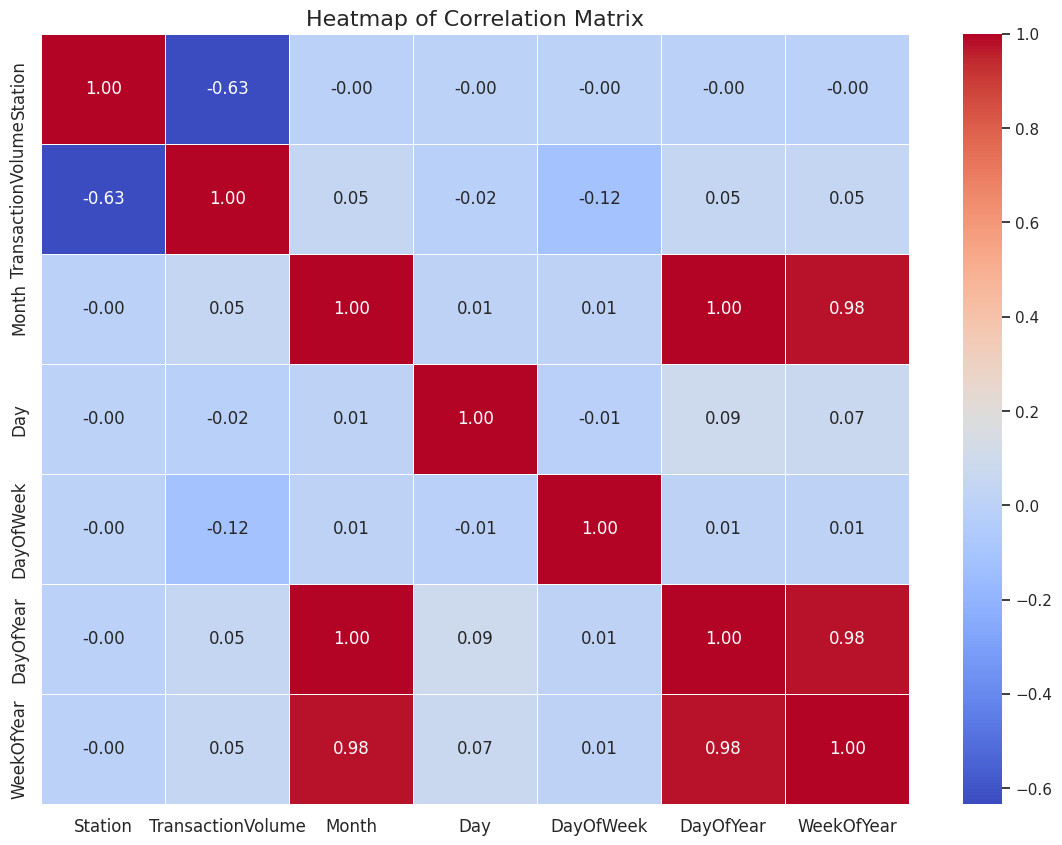

In [19]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


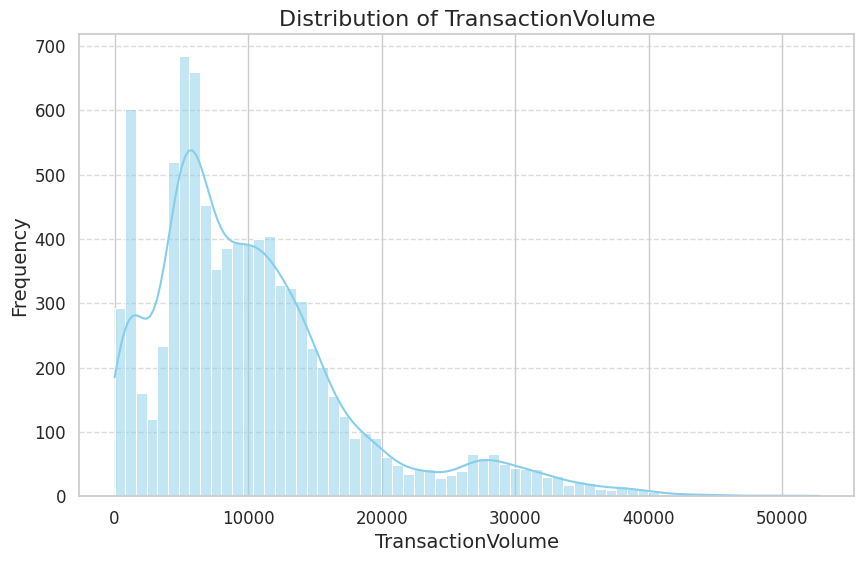

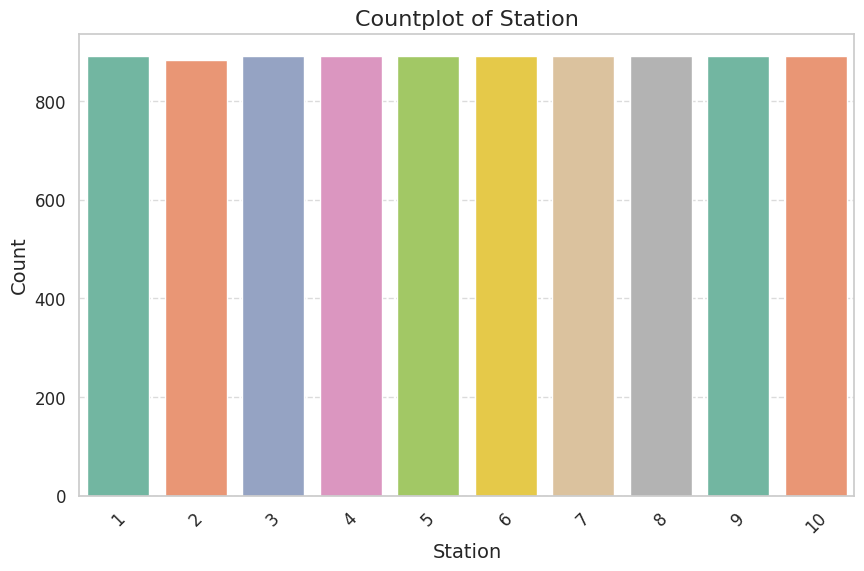

In [20]:
# 3. Distribution Analysis
numerical_columns = ['TransactionVolume']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_aggregated_combined[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Countplot for categorical columns
categorical_columns = ['Station']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df_aggregated_combined, x=col, palette='Set2')
    plt.title(f'Countplot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [18]:
df_aggregated_combined.isnull().sum()

Station              0
DateOnly             0
TransactionVolume    0
Month                0
Day                  0
DayOfWeek            0
DayOfYear            0
WeekOfYear           0
dtype: int64

In [19]:
for column_name in df_aggregated_combined.columns:
    column = df_aggregated_combined[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print(column_name, ':', count)

Station : 0
DateOnly : 0
TransactionVolume : 2
Month : 0
Day : 0
DayOfWeek : 1278
DayOfYear : 0
WeekOfYear : 0


# Transaction volume for each day

In [23]:
import pandas as pd

# Convert DateTransaction to datetime if it is not already
#df['DateTransaction'] = pd.to_datetime(df['DateTransaction'])

# Extract the date part of DateTransaction
#df['DateOnly'] = df['DateTransaction'].dt.date

# Aggregate transaction volume for each day
daily_aggregation = df_aggregated_combined.groupby('DateOnly')['TransactionVolume'].sum().reset_index()

# Display the result
print(daily_aggregation)


      DateOnly  TransactionVolume
0   2022-01-01           78769.32
1   2022-01-02           63515.73
2   2022-01-03           95897.53
3   2022-01-04           84267.97
4   2022-01-05           89559.73
..         ...                ...
887 2024-06-06          109579.96
888 2024-06-07          112869.76
889 2024-06-08          101135.34
890 2024-06-09           74624.70
891 2024-06-10          121284.83

[892 rows x 2 columns]


# Transaction volume for each station

In [24]:
import pandas as pd

# Assuming your DataFrame is named df and has columns 'Station', 'DateTransaction', and 'TransactionVolume'
# Ensure 'DateTransaction' is in datetime format
#df['DateTransaction'] = pd.to_datetime(df['DateTransaction'])

# Aggregate transaction volume for each station
station_aggregation = df_aggregated_combined.groupby('Station')['TransactionVolume'].sum().reset_index()

# Display the result
print(station_aggregation)


   Station  TransactionVolume
0        1        25113517.34
1        2        12995776.40
2        3        10421089.60
3        4         4727200.69
4        5         7907346.32
5        6         3929252.34
6        7        10274349.27
7        8         9928236.09
8        9         6396698.91
9       10          995138.70


In [25]:
station_aggregation['Station'] = station_aggregation['Station'].astype(str)

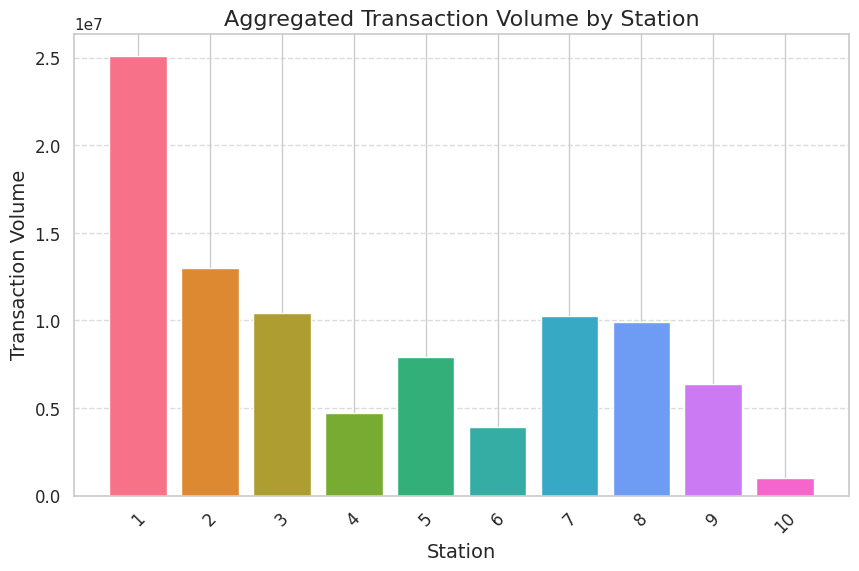

In [26]:
if station_aggregation.empty:
    print("No data available to plot.")
else:
    # Visualization with colormap
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('husl', len(station_aggregation))  # Using husl colormap for distinct colors
    plt.bar(
        station_aggregation['Station'],
        station_aggregation['TransactionVolume'],
        color=colors
    )
    plt.title('Aggregated Transaction Volume by Station', fontsize=16)
    plt.xlabel('Station', fontsize=14)
    plt.ylabel('Transaction Volume', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate station labels for better readability
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Transaction volume for each station by day

In [27]:
import pandas as pd

# Assuming your DataFrame is named df and has columns 'Station', 'DateTransaction', and 'TransactionVolume'
# Ensure 'DateTransaction' is in datetime format
#df['DateTransaction'] = pd.to_datetime(df['DateTransaction'])

# Extract the date part of DateTransaction
#df['DateOnly'] = df['DateTransaction'].dt.date

# Aggregate transaction volume for each station by day
station_daily_aggregation = df_aggregated_combined.groupby(['Station', 'DateOnly'])['TransactionVolume'].sum().reset_index()

# Display the result
print(station_daily_aggregation)


      Station   DateOnly  TransactionVolume
0           1 2022-01-01           18915.48
1           1 2022-01-02           15040.02
2           1 2022-01-03           21886.33
3           1 2022-01-04           18649.30
4           1 2022-01-05           19775.58
...       ...        ...                ...
8906       10 2024-06-06             700.55
8907       10 2024-06-07            1333.33
8908       10 2024-06-08             809.80
8909       10 2024-06-09            1672.28
8910       10 2024-06-10            1051.92

[8911 rows x 3 columns]


# Creating Cyclic Features

In [20]:
import numpy as np

# Function to create cyclic features
def create_cyclic_features(df_aggregated_combined, column, max_val):
    df_aggregated_combined[column + '_sin'] = np.sin(2 * np.pi * df_aggregated_combined[column] / max_val)
    df_aggregated_combined[column + '_cos'] = np.cos(2 * np.pi * df_aggregated_combined[column] / max_val)
    return df_aggregated_combined

# Apply the function to create cyclic features for Year, Month, and Hour
df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'Month', 12)
df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'Day', 31)
#df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'Hour', 24)
#df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'Minute', 60)
#df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'Second', 60)
df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'DayOfWeek', 7)
df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'DayOfYear', 365)
df_aggregated_combined = create_cyclic_features(df_aggregated_combined, 'WeekOfYear', 52)

# Drop the original columns after creating cyclic features
df_aggregated_combined.drop(columns=['Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear'], inplace=True)

# Display the first few rows of the dataframe
df_aggregated_combined.head()

Station   DateOnly  TransactionVolume  Month_sin  Month_cos   Day_sin  \
0        1 2022-01-01           18915.48        0.5   0.866025  0.201299   
1        1 2022-01-02           15040.02        0.5   0.866025  0.394356   
2        1 2022-01-03           21886.33        0.5   0.866025  0.571268   
3        1 2022-01-04           18649.30        0.5   0.866025  0.724793   
4        1 2022-01-05           19775.58        0.5   0.866025  0.848644   

    Day_cos  DayOfWeek_sin  DayOfWeek_cos  DayOfYear_sin  DayOfYear_cos  \
0  0.979530      -0.974928      -0.222521       0.017213       0.999852   
1  0.918958      -0.781831       0.623490       0.034422       0.999407   
2  0.820763       0.000000       1.000000       0.051620       0.998667   
3  0.688967       0.781831       0.623490       0.068802       0.997630   
4  0.528964       0.974928      -0.222521       0.085965       0.996298   

   WeekOfYear_sin  WeekOfYear_cos  
0             0.0             1.0  
1             0.0             1.0  
2        0.120537        0.992709  
3        0.120537        0.992709  
4        0.120537        0.992709

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


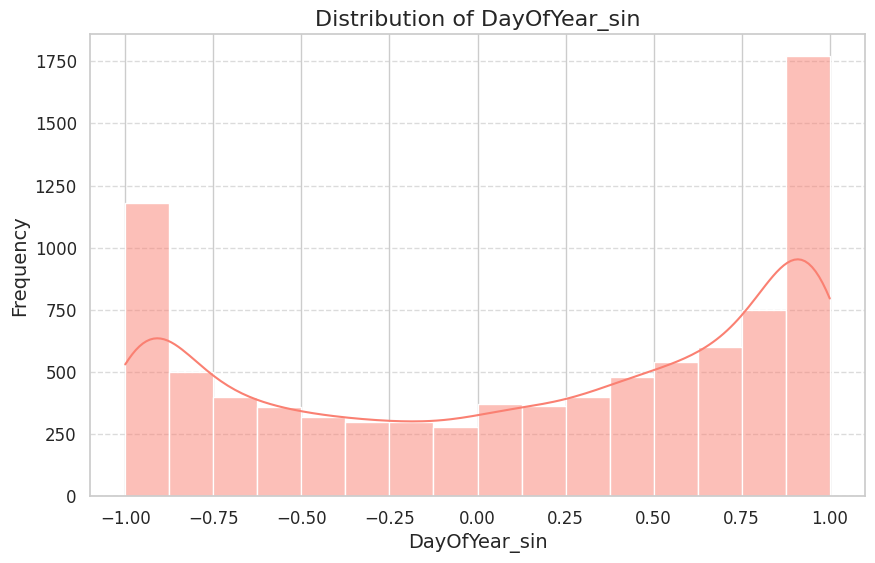

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


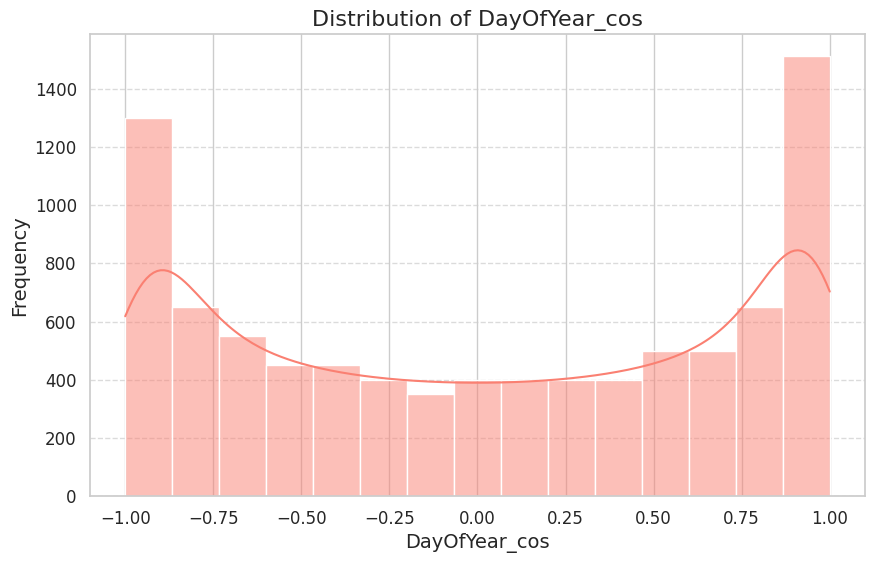

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Seasonality Analysis
seasonality_columns = [ 'DayOfYear_sin', 'DayOfYear_cos']
for col in seasonality_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_aggregated_combined[col], kde=True, color='salmon')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


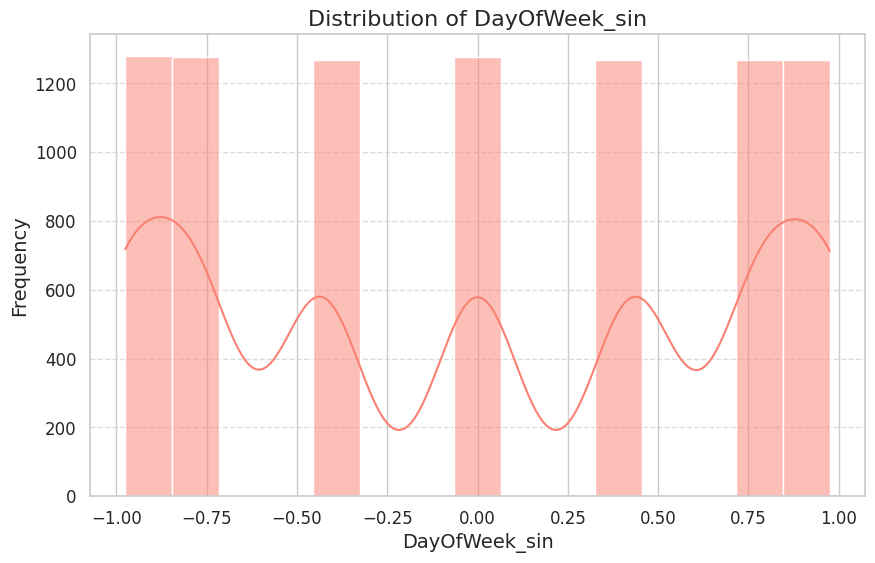

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


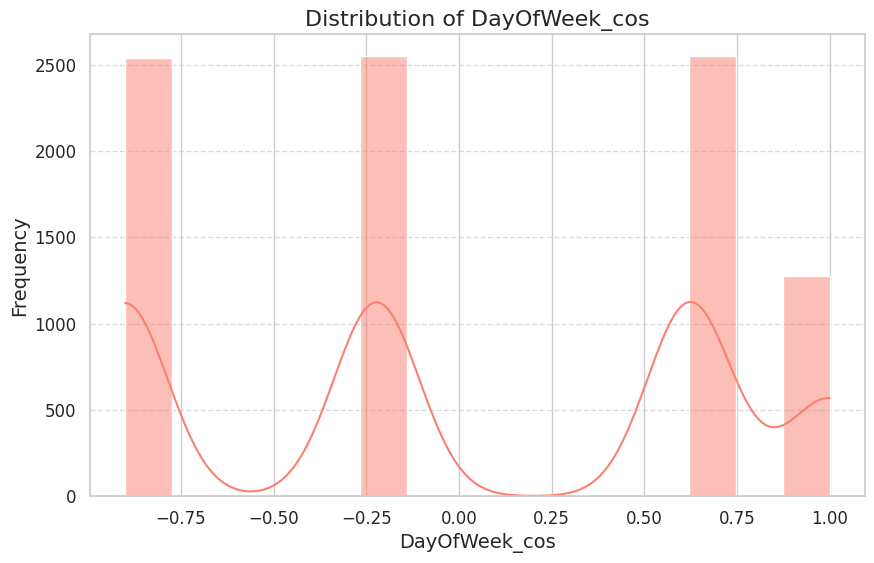

In [28]:
# Seasonality Analysis
seasonality_columns = [ 'DayOfWeek_sin', 'DayOfWeek_cos']
for col in seasonality_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_aggregated_combined[col], kde=True, color='salmon')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [30]:
# Ensure only numeric columns are included in the correlation matrix
num_df = df_aggregated_combined.select_dtypes(include=[np.number])

In [31]:
# Correlation matrix
corr_mat = num_df.corr()
print("\nCorrelation Matrix:")
print(corr_mat)


Correlation Matrix:
                    Station  TransactionVolume  Month_sin  Month_cos  \
Station            1.000000          -0.632924   0.000662   0.001548   
TransactionVolume -0.632924           1.000000  -0.049448  -0.008379   
Month_sin          0.000662          -0.049448   1.000000  -0.000231   
Month_cos          0.001548          -0.008379  -0.000231   1.000000   
Day_sin            0.000958           0.008326  -0.000168  -0.016044   
Day_cos           -0.001135           0.025282  -0.010295  -0.012565   
DayOfWeek_sin     -0.000148           0.090030   0.001802  -0.000960   
DayOfWeek_cos      0.000312          -0.049811  -0.002311   0.002064   
DayOfYear_sin      0.000137          -0.045756   0.953890  -0.259805   
DayOfYear_cos      0.001686          -0.021428   0.261344   0.952860   
WeekOfYear_sin     0.000196          -0.046473   0.962229  -0.223526   
WeekOfYear_cos     0.001678          -0.020806   0.223792   0.961573   

                    Day_sin   Day_cos  Day

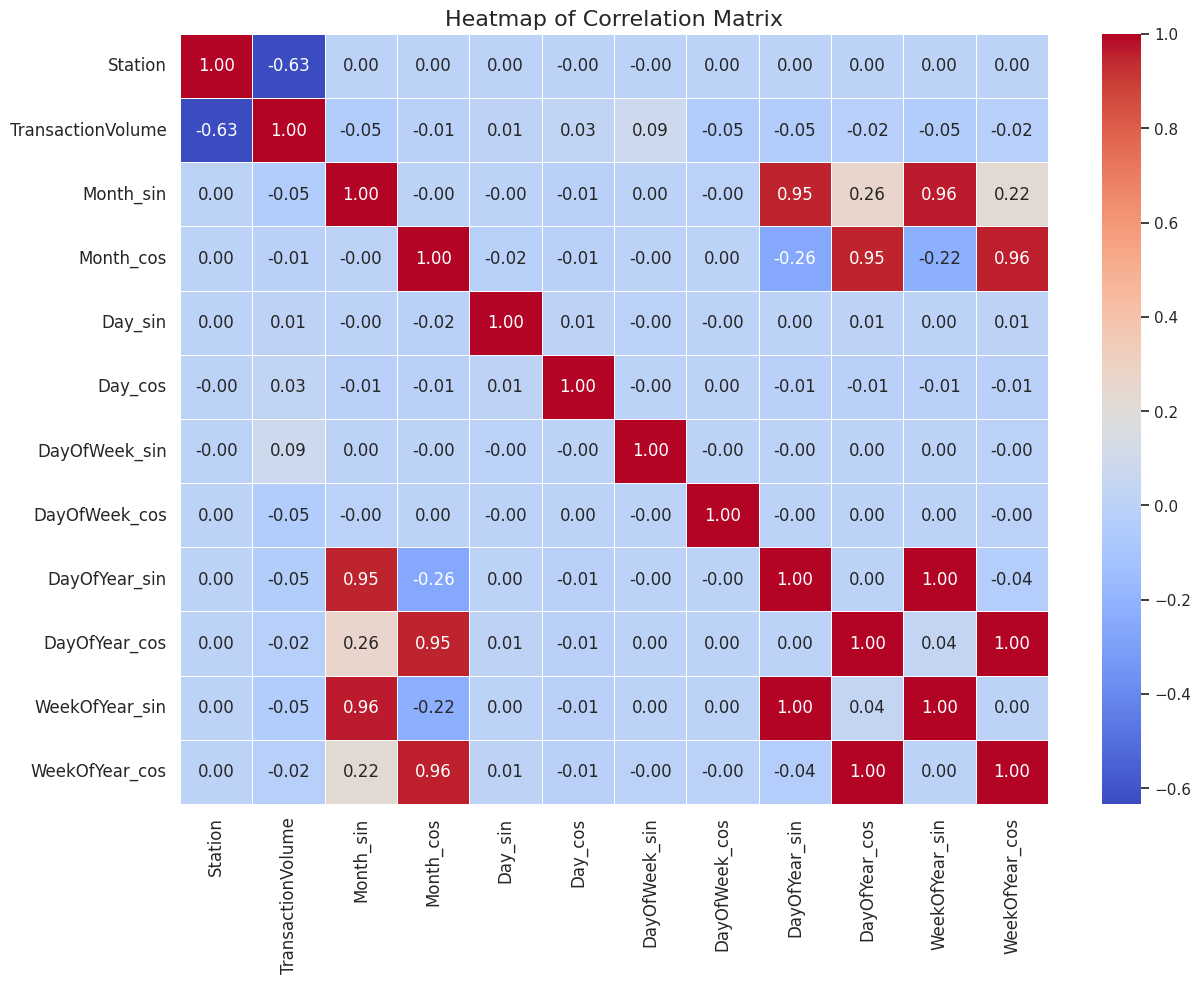

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap of Correlation Matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [33]:
# Check data types and confirm no non-numeric columns are present
print(df_aggregated_combined.dtypes)

# Check for NaNs
print(df_aggregated_combined.isna().sum())


Station                       int64
DateOnly             datetime64[ns]
TransactionVolume           float64
Month_sin                   float64
Month_cos                   float64
Day_sin                     float64
Day_cos                     float64
DayOfWeek_sin               float64
DayOfWeek_cos               float64
DayOfYear_sin               float64
DayOfYear_cos               float64
WeekOfYear_sin              Float64
WeekOfYear_cos              Float64
dtype: object
Station              0
DateOnly             0
TransactionVolume    0
Month_sin            0
Month_cos            0
Day_sin              0
Day_cos              0
DayOfWeek_sin        0
DayOfWeek_cos        0
DayOfYear_sin        0
DayOfYear_cos        0
WeekOfYear_sin       0
WeekOfYear_cos       0
dtype: int64


# Transaction volume for each station by day with cyclic features

In [21]:
df_aggregated_with_cyclic = df_aggregated_combined
#df_aggregated_with_cyclic.head()
df_aggregated_with_cyclic.tail()

Station   DateOnly  TransactionVolume     Month_sin  Month_cos  \
8906       10 2024-06-06             700.55  1.224647e-16       -1.0   
8907       10 2024-06-07            1333.33  1.224647e-16       -1.0   
8908       10 2024-06-08             809.80  1.224647e-16       -1.0   
8909       10 2024-06-09            1672.28  1.224647e-16       -1.0   
8910       10 2024-06-10            1051.92  1.224647e-16       -1.0   

       Day_sin   Day_cos  DayOfWeek_sin  DayOfWeek_cos  DayOfYear_sin  \
8906  0.937752  0.347305       0.433884      -0.900969       0.409356   
8907  0.988468  0.151428      -0.433884      -0.900969       0.393590   
8908  0.998717 -0.050649      -0.974928      -0.222521       0.377708   
8909  0.968077 -0.250653      -0.781831       0.623490       0.361714   
8910  0.897805 -0.440394       0.000000       1.000000       0.345612   

      DayOfYear_cos  WeekOfYear_sin  WeekOfYear_cos  
8906      -0.912375        0.354605       -0.935016  
8907      -0.919286        0.354605       -0.935016  
8908      -0.925925        0.354605       -0.935016  
8909      -0.932289        0.354605       -0.935016  
8910      -0.938377        0.239316       -0.970942

In [35]:
# Convert 'DateOnly' column to datetime if not already
df_aggregated_with_cyclic['DateOnly'] = pd.to_datetime(df_aggregated_with_cyclic['DateOnly'])

# Filter the data for the specific date and station
filtered_data = df_aggregated_with_cyclic[
    (df_aggregated_with_cyclic['DateOnly'] == pd.to_datetime('2024-06-01')) & 
    (df_aggregated_with_cyclic['Station'] == 10)
]

# Retrieve the TransactionVolume
transaction_volume = filtered_data['TransactionVolume'].values

# Display the result
if len(transaction_volume) > 0:
    print(f"Transaction Volume for Station 0 on 2022-01-01: {transaction_volume[0]}")
else:
    print("No data available for Station 0 on 2022-01-01.")


Transaction Volume for Station 0 on 2022-01-01: 951.23


In [36]:
# Check for NaNs
print(df_aggregated_with_cyclic.isna().sum())

Station              0
DateOnly             0
TransactionVolume    0
Month_sin            0
Month_cos            0
Day_sin              0
Day_cos              0
DayOfWeek_sin        0
DayOfWeek_cos        0
DayOfYear_sin        0
DayOfYear_cos        0
WeekOfYear_sin       0
WeekOfYear_cos       0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

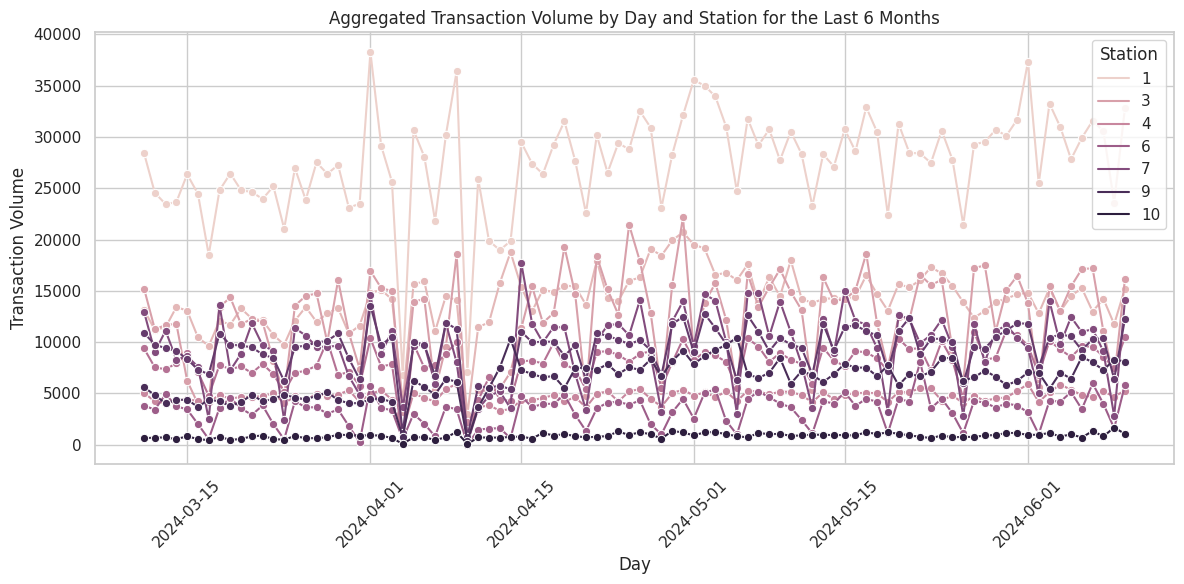

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta

# Ensure 'DateOnly' is in datetime format
df_aggregated_with_cyclic['DateOnly'] = pd.to_datetime(df_aggregated_with_cyclic['DateOnly'])

# Calculate the date 6 months ago from today
end_date = datetime.today()
start_date = end_date - timedelta(days=6*30)  # Approximation of 6 months

# Filter data for the last 6 months
df_last_6_months = df_aggregated_with_cyclic[(df_aggregated_with_cyclic['DateOnly'] >= start_date) & (df_aggregated_with_cyclic['DateOnly'] <= end_date)]

# Plot transaction volume aggregated by station and day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_last_6_months, x='DateOnly', y='TransactionVolume', hue='Station', marker='o')
plt.title('Aggregated Transaction Volume by Day and Station for the Last 6 Months')
plt.xlabel('Day')
plt.ylabel('Transaction Volume')
plt.xticks(rotation=45)
plt.legend(title='Station')
plt.tight_layout()
plt.show()


## DBSCAN

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

def chunk_array(arr, batch_size):
    for i in range(0, len(arr), batch_size):
        yield arr[i:i + batch_size]

# Convert df_aggregated_with_cyclic to DataFrame if it's not already one
if isinstance(df_aggregated_with_cyclic, np.ndarray):
    df_aggregated_with_cyclic = pd.DataFrame(df_aggregated_with_cyclic)

# Check if there are any non-numeric columns and handle them appropriately
if not np.issubdtype(df_aggregated_with_cyclic.dtypes, np.number):
    numeric_columns = df_aggregated_with_cyclic.select_dtypes(include=[np.number]).columns
    df_numeric = df_aggregated_with_cyclic[numeric_columns]
else:
    df_numeric = df_aggregated_with_cyclic  # Assuming all columns are numeric if no non-numeric columns exist

# Apply MinMaxScaler to numeric data, excluding 'TransactionVolume'
scaler = MinMaxScaler(feature_range=(0, 1))
features_to_scale = df_numeric.columns.difference(['TransactionVolume'])
df_numeric_scaled = df_numeric.copy()
df_numeric_scaled[features_to_scale] = scaler.fit_transform(df_numeric[features_to_scale])

# Apply DBSCAN clustering on the scaled data
eps = 0.5  # Epsilon parameter; adjust based on your data
min_samples = 10  # Minimum number of samples in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
df_numeric_scaled['Cluster'] = dbscan.fit_predict(df_numeric_scaled[features_to_scale])

# Ensure the length of cluster labels matches the number of rows in df_reduced
if len(df_numeric_scaled) == len(df_aggregated_with_cyclic):
    df_aggregated_with_cyclic['Cluster'] = df_numeric_scaled['Cluster']
else:
    raise ValueError("Length mismatch between cluster labels and original DataFrame")

# Display the cluster distribution
print(df_aggregated_with_cyclic['Cluster'].value_counts())


Cluster
0    8911
Name: count, dtype: int64


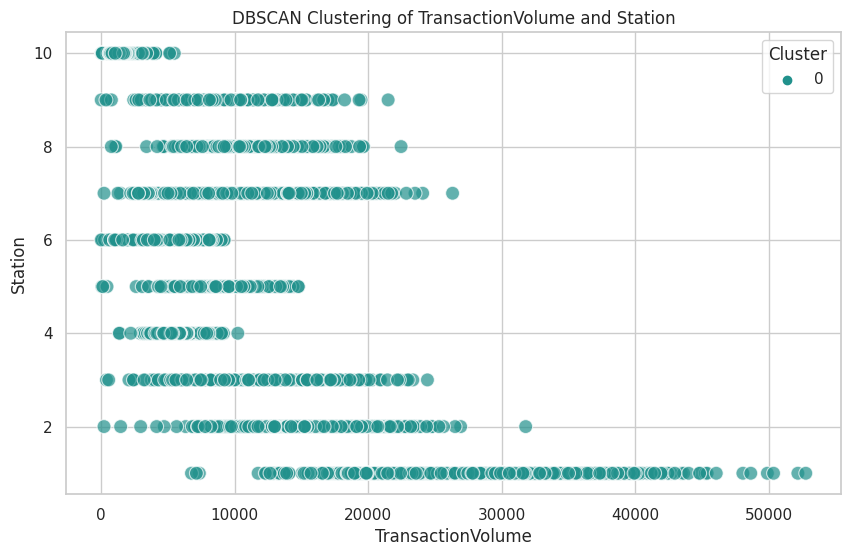

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two features for visualization (e.g., TransactionVolume and one of your cyclic features)
x_feature = 'TransactionVolume'
y_feature = 'Station'

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the scatterplot using Seaborn, colored by the cluster label
sns.scatterplot(data=df_aggregated_with_cyclic, x=x_feature, y=y_feature, hue='Cluster', palette='viridis', s=100, alpha=0.7)

# Add plot labels and title
plt.title('DBSCAN Clustering of TransactionVolume and Station')
plt.xlabel(x_feature)
plt.ylabel(y_feature)

# Show the plot
plt.legend(title='Cluster')
plt.show()


In [38]:
# Check the cluster distribution
print(df_aggregated_with_cyclic['Cluster'].value_counts())

# Optionally, inspect a few rows from each cluster to understand the data
for cluster_label in df_aggregated_with_cyclic['Cluster'].unique():
    print(f"Cluster {cluster_label} sample:")
    print(df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster_label].head())


Cluster
0    8911
Name: count, dtype: int64
Cluster 0 sample:
   Station   DateOnly  TransactionVolume  Month_sin  Month_cos   Day_sin  \
0        1 2022-01-01           18915.48        0.5   0.866025  0.201299   
1        1 2022-01-02           15040.02        0.5   0.866025  0.394356   
2        1 2022-01-03           21886.33        0.5   0.866025  0.571268   
3        1 2022-01-04           18649.30        0.5   0.866025  0.724793   
4        1 2022-01-05           19775.58        0.5   0.866025  0.848644   

    Day_cos  DayOfWeek_sin  DayOfWeek_cos  DayOfYear_sin  DayOfYear_cos  \
0  0.979530      -0.974928      -0.222521       0.017213       0.999852   
1  0.918958      -0.781831       0.623490       0.034422       0.999407   
2  0.820763       0.000000       1.000000       0.051620       0.998667   
3  0.688967       0.781831       0.623490       0.068802       0.997630   
4  0.528964       0.974928      -0.222521       0.085965       0.996298   

   WeekOfYear_sin  WeekOfYear_

## Analyze Cluster

Summary Statistics for Clusters 0 and 1 and 2:
           Station                       DateOnly  TransactionVolume  \
count  8911.000000                           8911        8911.000000   
mean      5.503535  2023-03-22 13:41:04.773874944       10401.594171   
min       1.000000            2022-01-01 00:00:00           0.000000   
25%       3.000000            2022-08-11 00:00:00        5146.190000   
50%       6.000000            2023-03-23 00:00:00        8789.650000   
75%       8.000000            2023-11-01 00:00:00       13537.805000   
max      10.000000            2024-06-10 00:00:00       52764.450000   
std       2.871737                            NaN        7833.258620   

         Month_sin     Month_cos       Day_sin      Day_cos  DayOfWeek_sin  \
count  8911.000000  8.911000e+03  8.911000e+03  8911.000000    8911.000000   
mean      0.122003 -1.460159e-02  9.442986e-03    -0.014015      -0.001884   
min      -1.000000 -1.000000e+00 -9.987165e-01    -0.994869      -0.97

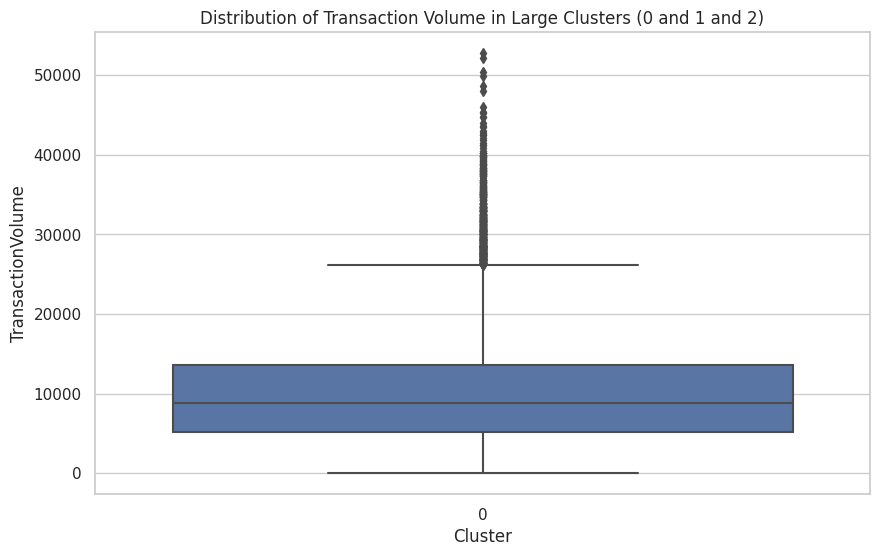

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

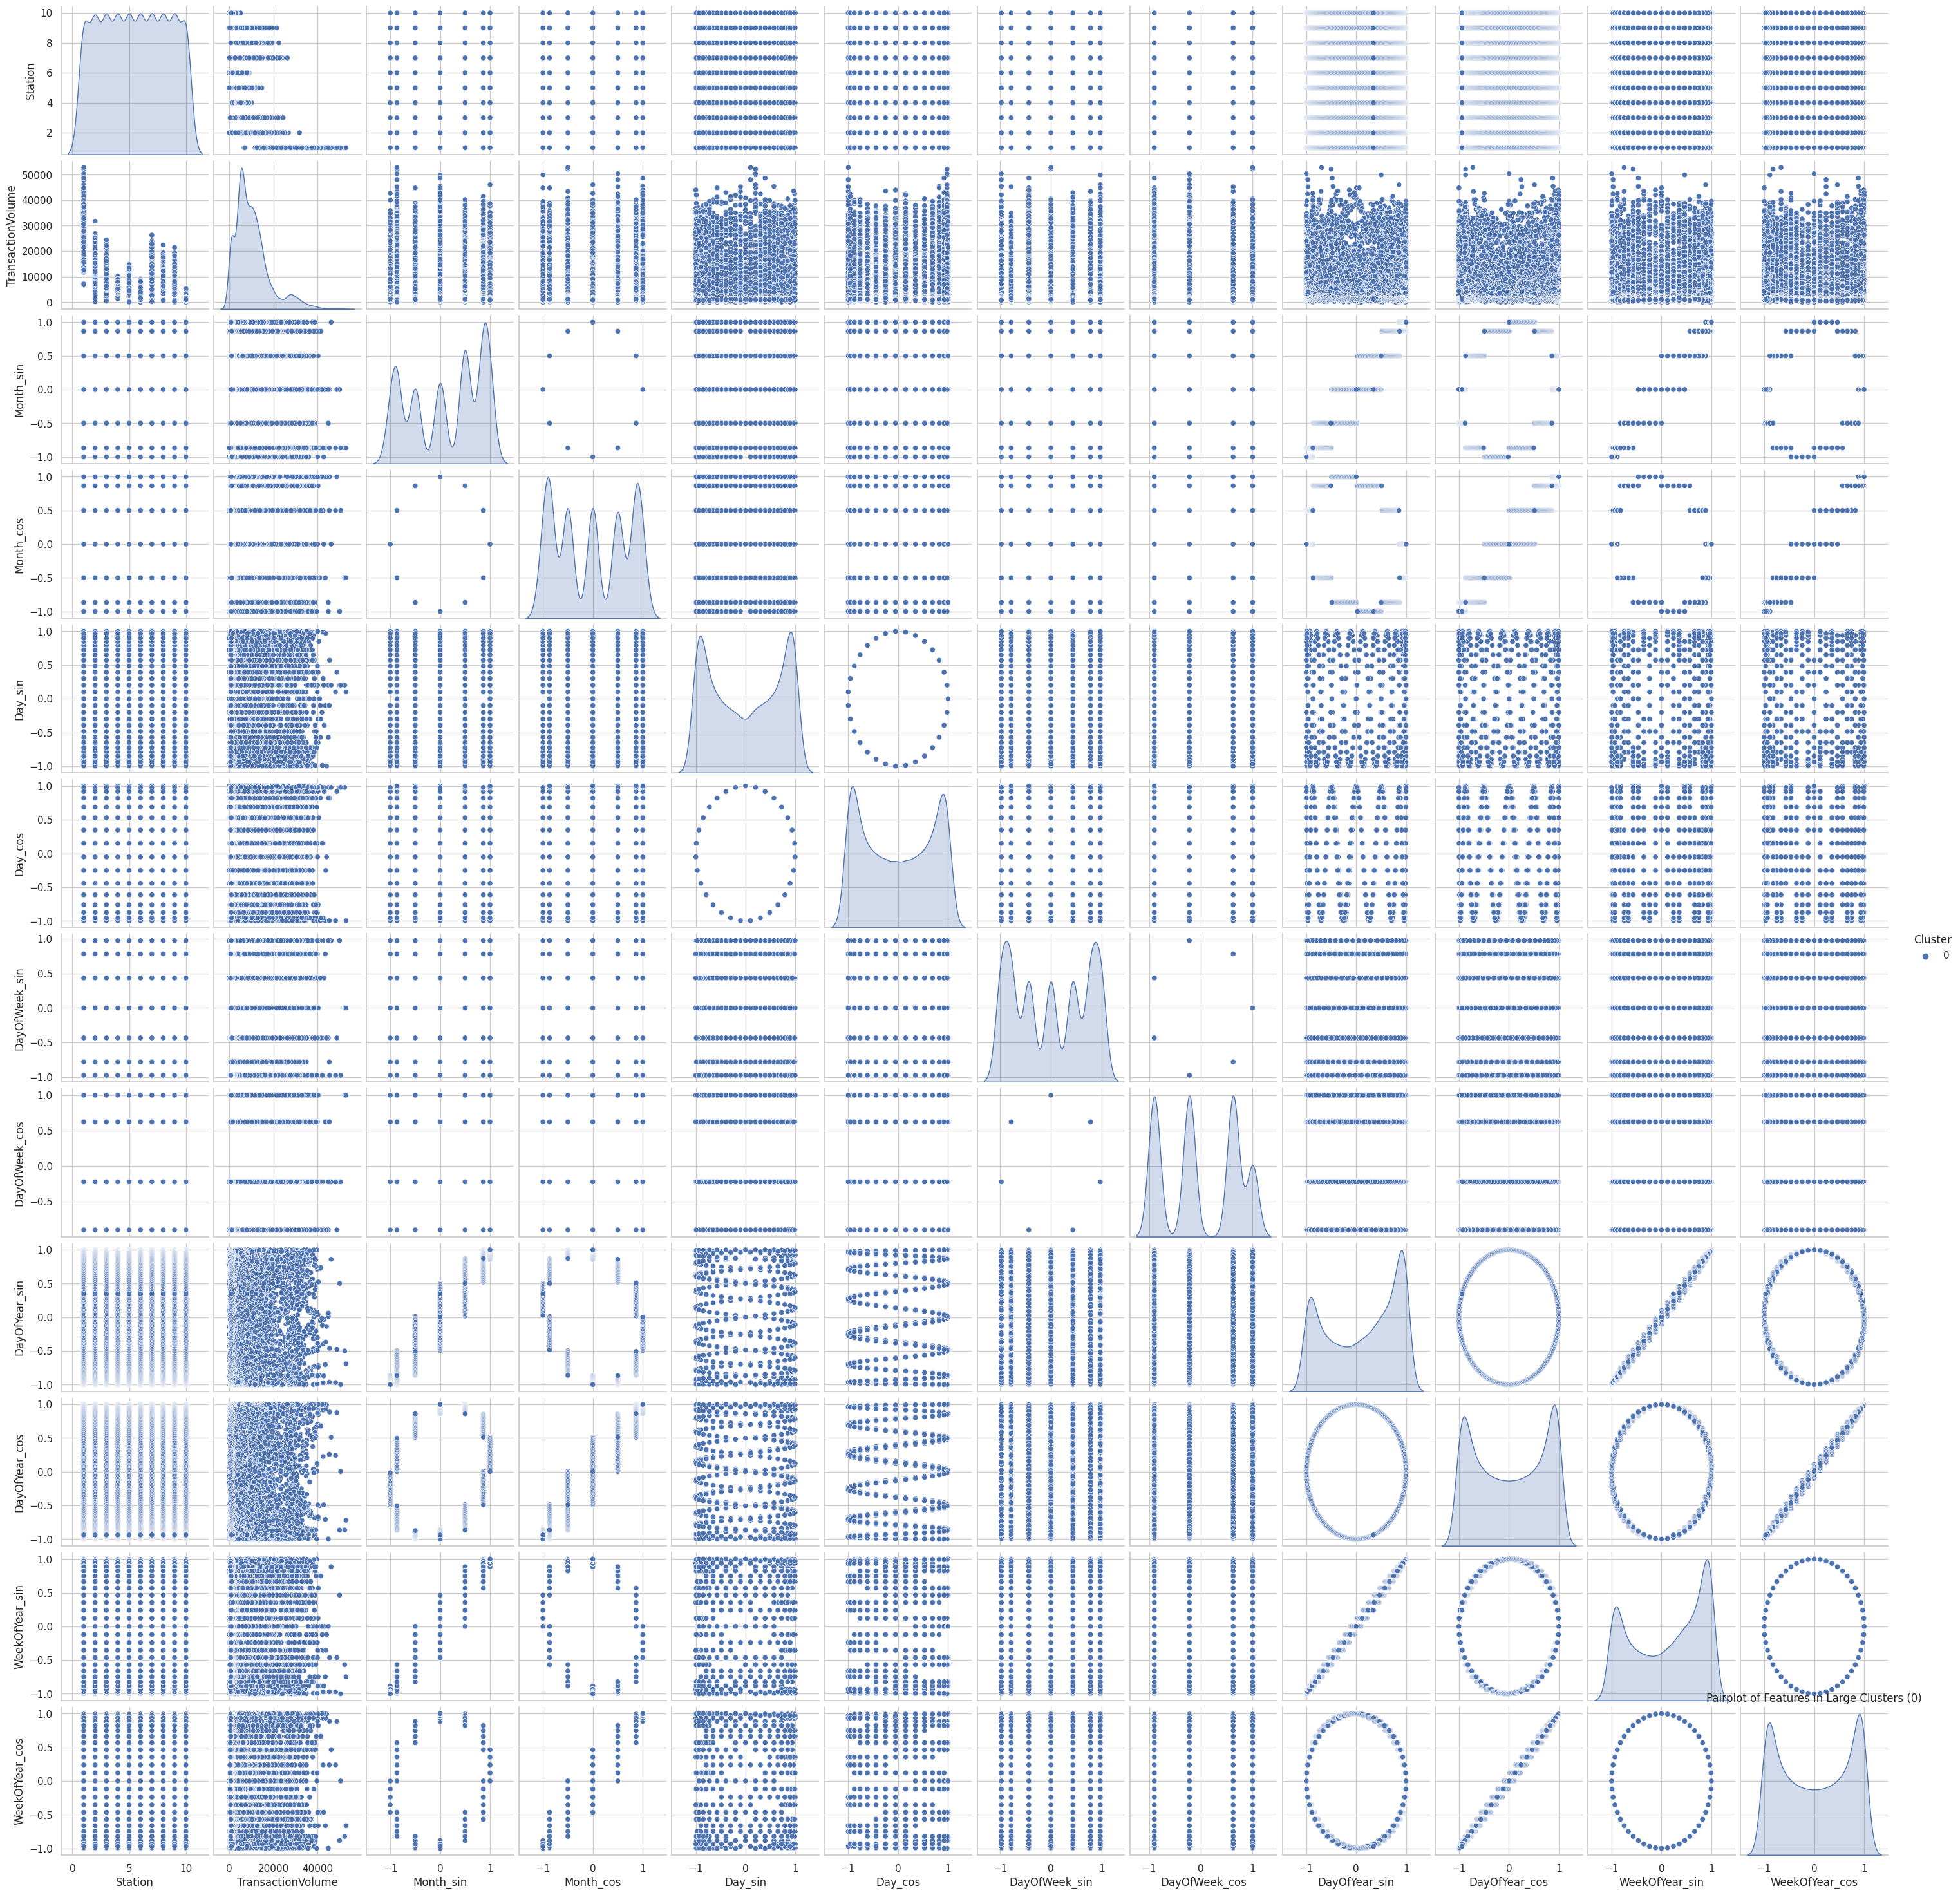

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for clusters 0 and 1
large_clusters = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'].isin([0])]

# Summary statistics for large clusters
summary_stats_large = large_clusters.describe()
print("Summary Statistics for Clusters 0 and 1 and 2:")
print(summary_stats_large)

# Plot distribution of transaction volume for each large cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TransactionVolume', data=large_clusters)
plt.title('Distribution of Transaction Volume in Cluster')
plt.show()

# Pairplot to explore relationships between features in large clusters
sns.pairplot(large_clusters, hue='Cluster')
plt.title('Pairplot of Features in Cluster')
plt.show()


# Deep Learning models

## RNN

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences_rnn(data, sequence_length, target_column='TransactionVolume'):
    data = pd.DataFrame(data, columns=data.columns)
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    features = np.array(features)
    target = np.array(target)

    X_rnn, y_rnn = [], []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length, :]
        X_rnn.append(seq)
        y_rnn.append(target[i + sequence_length])

    return np.array(X_rnn), np.array(y_rnn)

# Function to build a simplified RNN model with Dropout and fewer layers
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=30, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to perform cross-validation and model training
def cross_validate_and_train_rnn(cluster_data, sequence_length, n_splits=5, epochs=50, batch_size=32):
    X_rnn, y_rnn = create_sequences_rnn(cluster_data, sequence_length)

    tscv = TimeSeriesSplit(n_splits=n_splits)
    fold_metrics_rnn = []
    last_val_idx_rnn = None  # Initialize the last_val_idx
    last_val_X_rnn = None
    last_val_y_rnn = None

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_rnn)):
        print(f"Training fold {fold + 1}/{n_splits}...")
        
        train_X_rnn, val_X_rnn = X_rnn[train_idx], X_rnn[val_idx]
        train_y_rnn, val_y_rnn = y_rnn[train_idx], y_rnn[val_idx]
        last_val_idx_rnn = val_idx  # Update last_val_idx for each fold
        last_val_X_rnn = val_X_rnn
        last_val_y_rnn = val_y_rnn

        model_rnn = build_rnn_model((sequence_length, X_rnn.shape[2]))

        # Define early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Fit the model with early stopping
        model_rnn.fit(train_X_rnn, train_y_rnn, validation_data=(val_X_rnn, val_y_rnn), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

        # Make predictions on the validation set
        val_pred_rnn = model_rnn.predict(val_X_rnn)

        # Calculate evaluation metrics for the validation set
        mse_val_rnn = mean_squared_error(val_y_rnn, val_pred_rnn)
        rmse_val_rnn = np.sqrt(mse_val_rnn)
        mae_val_rnn = mean_absolute_error(val_y_rnn, val_pred_rnn)
        r2_val_rnn = r2_score(val_y_rnn, val_pred_rnn)

        print(f"Fold {fold + 1} Validation Set:")
        print(f"MSE: {mse_val_rnn}")
        print(f"RMSE: {rmse_val_rnn}")
        print(f"MAE: {mae_val_rnn}")
        print(f"R^2: {r2_val_rnn}")

        fold_metrics_rnn.append({'mse': mse_val_rnn, 'rmse': rmse_val_rnn, 'mae': mae_val_rnn, 'r2': r2_val_rnn})

    return model_rnn, fold_metrics_rnn, X_rnn, y_rnn, last_val_idx_rnn, last_val_X_rnn, last_val_y_rnn

# Create the clustered_data dictionary
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data_rnn = {}
for cluster in clusters:
    clustered_data_rnn[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column
for cluster, data in clustered_data_rnn.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Scale the data
scaler_rnn = MinMaxScaler(feature_range=(0, 1))
for cluster, data in clustered_data_rnn.items():
    columns = data.columns  # Preserve the original column names
    data_scaled = scaler_rnn.fit_transform(data)  # Scale all columns
    clustered_data_rnn[cluster] = pd.DataFrame(data_scaled, columns=columns)  # Restore column names

# Set sequence length
sequence_length = 30

In [38]:
# Perform cross-validation and train model for cluster 0
model_rnn, fold_metrics_rnn, X_rnn, y_rnn, last_val_idx_rnn, last_val_X_rnn, last_val_y_rnn = cross_validate_and_train_rnn(clustered_data_rnn[0], sequence_length)

Training fold 1/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.3375 - val_loss: 0.0425
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1759 - val_loss: 0.0192
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1075 - val_loss: 0.0143
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0734 - val_loss: 0.0339
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0635 - val_loss: 0.0111
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0478 - val_loss: 0.0123
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - val_loss: 0.0217
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0346 - val_loss: 0.0112
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 - val_loss: 0.0128
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0309 - val_loss: 0.0163
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 1 Validation Set:
MSE: 0.011121730943751917
RMSE: 0.1054596175972202
MAE: 0.08465062500093667
R^2: -0.4828437775477403
Tr

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.4909 - val_loss: 0.0624
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1884 - val_loss: 0.0096
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1031 - val_loss: 0.0143
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0644 - val_loss: 0.0272
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0481 - val_loss: 0.0296
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0355 - val_loss: 0.0277
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0316 - val_loss: 0.0296
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 2 Validation Set:
MSE: 0.009629156215643773
RMSE: 0.09812826410185688
MAE: 0.07998888904960196
R^2: -3.79722974121899
Training fold 3/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.6420 - val_loss: 0.0277
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1333 - val_loss: 0.0293
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0750 - val_loss: 0.0314
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - val_loss: 0.0372
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0371 - val_loss: 0.0351
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0316 - val_loss: 0.0347
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 3 Validation Set:
MSE: 0.02767910133459757
RMSE: 0.16637037396903803
MAE: 0.14010452022450143
R^2: -2.146550950014286
Training fold 4/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.2545 - val_loss: 0.0282
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0583 - val_loss: 0.0250
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0317 - val_loss: 0.0132
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - val_loss: 0.0063
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - val_loss: 0.0050
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - val_loss: 0.0051
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - val_loss: 0.0051
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - val_loss: 0.0078
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - val_loss: 0.0049
Epoch 10/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - val_loss: 0.0055
Epoch 11/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - val_loss: 0.0049
Epoch 12/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


232/232 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.2412 - val_loss: 0.0040
Epoch 2/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0515 - val_loss: 0.0037
Epoch 3/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - val_loss: 0.0039
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - val_loss: 0.0043
Epoch 5/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - val_loss: 0.0040
Epoch 6/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - val_loss: 0.0064
Epoch 7/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - val_loss: 0.0131
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 5 Validation Set:
MSE: 0.0036782877806013398
RMSE: 0.06064888935999851
MAE: 0.04614127230307164
R^2: 0.1069315244865674


In [39]:
# Test the model on the last fold's validation set as an example
val_pred_rnn = model_rnn.predict(last_val_X_rnn)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
# Calculate and print evaluation metrics
mse_val_rnn = mean_squared_error(last_val_y_rnn, val_pred_rnn)
rmse_val_rnn = np.sqrt(mse_val_rnn)
mae_val_rnn = mean_absolute_error(last_val_y_rnn, val_pred_rnn)
r2_val_rnn = r2_score(last_val_y_rnn, val_pred_rnn)

print("Evaluation Metrics for the Last Fold Validation Set (RNN):")
print(f"MSE: {mse_val_rnn}")
print(f"RMSE: {rmse_val_rnn}")
print(f"MAE: {mae_val_rnn}")
print(f"R^2: {r2_val_rnn}")

Evaluation Metrics for the Last Fold Validation Set (RNN):
MSE: 0.0036782877806013398
RMSE: 0.06064888935999851
MAE: 0.04614127230307164
R^2: 0.1069315244865674


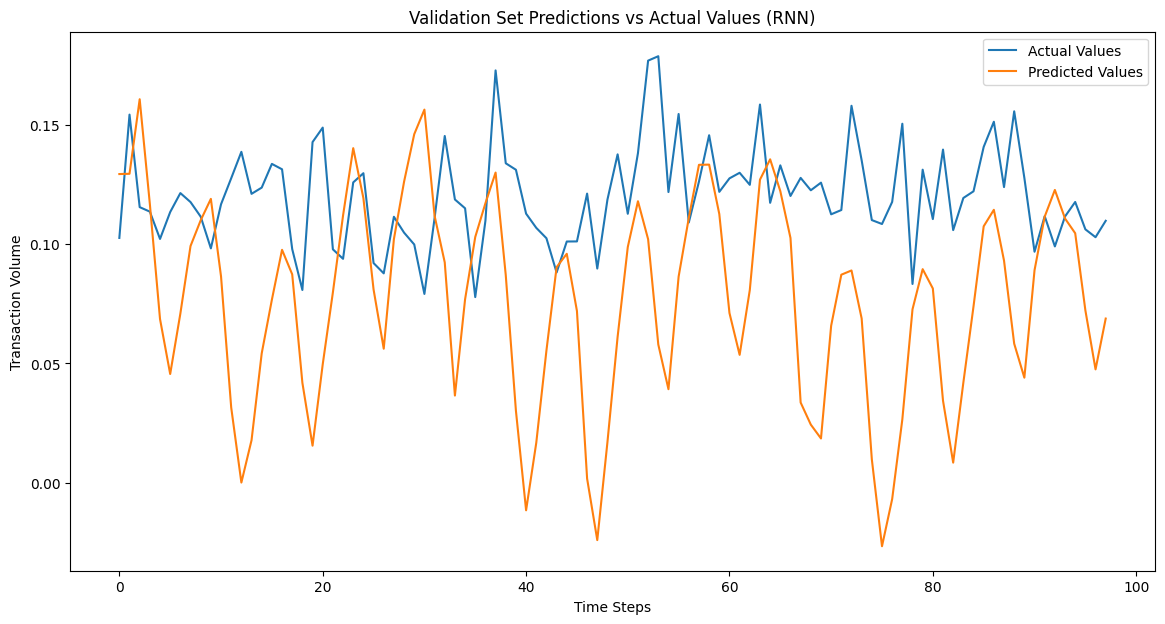

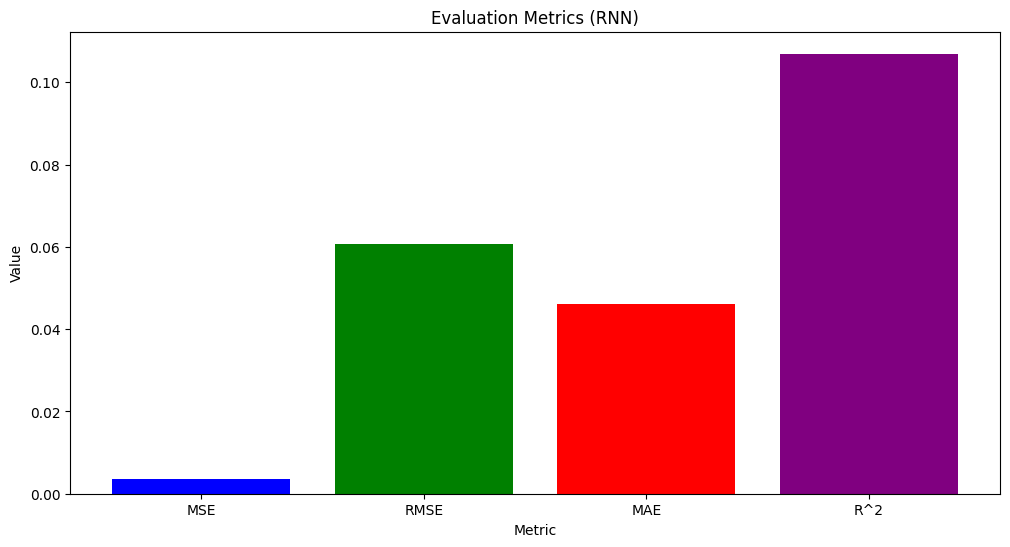

In [41]:
# Visualization
# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(last_val_y_rnn[:len(last_val_y_rnn)//15], label='Actual Values')
plt.plot(val_pred_rnn[:len(val_pred_rnn)//15], label='Predicted Values')
plt.title('Validation Set Predictions vs Actual Values (RNN)')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Volume')
plt.legend()
plt.show()

# Plot evaluation metrics as a bar chart
metrics_rnn = {'MSE': mse_val_rnn, 'RMSE': rmse_val_rnn, 'MAE': mae_val_rnn, 'R^2': r2_val_rnn}
plt.figure(figsize=(12, 6))
plt.bar(metrics_rnn.keys(), metrics_rnn.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics (RNN)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

## LSTM

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, sequence_length, target_column='TransactionVolume'):
    data = pd.DataFrame(data, columns=data.columns)
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    features = np.array(features)
    target = np.array(target)

    X, y = [], []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length, :]
        X.append(seq)
        y.append(target[i + sequence_length])

    return np.array(X), np.array(y)

# Function to build a simplified LSTM model with Dropout and fewer layers
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=30, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to perform cross-validation and model training
def cross_validate_and_train(cluster_data, sequence_length, n_splits=5, epochs=50, batch_size=32):
    X, y = create_sequences(cluster_data, sequence_length)

    tscv = TimeSeriesSplit(n_splits=n_splits)
    fold_metrics = []
    last_val_idx = None  # Initialize the last_val_idx
    last_val_X = None
    last_val_y = None

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        print(f"Training fold {fold + 1}/{n_splits}...")
        
        train_X, val_X = X[train_idx], X[val_idx]
        train_y, val_y = y[train_idx], y[val_idx]
        last_val_idx = val_idx  # Update last_val_idx for each fold
        last_val_X = val_X
        last_val_y = val_y

        model = build_lstm_model((sequence_length, X.shape[2]))

        # Define early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Fit the model with early stopping
        model.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

        # Make predictions on the validation set
        val_pred = model.predict(val_X)

        # Calculate evaluation metrics for the validation set
        mse_val = mean_squared_error(val_y, val_pred)
        rmse_val = np.sqrt(mse_val)
        mae_val = mean_absolute_error(val_y, val_pred)
        r2_val = r2_score(val_y, val_pred)

        print(f"Fold {fold + 1} Validation Set:")
        print(f"MSE: {mse_val}")
        print(f"RMSE: {rmse_val}")
        print(f"MAE: {mae_val}")
        print(f"R^2: {r2_val}")

        fold_metrics.append({'mse': mse_val, 'rmse': rmse_val, 'mae': mae_val, 'r2': r2_val})

    return model, fold_metrics, X, y, last_val_idx, last_val_X, last_val_y

# Create the clustered_data dictionary
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data = {}
for cluster in clusters:
    clustered_data[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column
for cluster, data in clustered_data.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
for cluster, data in clustered_data.items():
    columns = data.columns  # Preserve the original column names
    data_scaled = scaler.fit_transform(data)  # Scale all columns
    clustered_data[cluster] = pd.DataFrame(data_scaled, columns=columns)  # Restore column names

# Set sequence length
sequence_length = 30

In [30]:
# Perform cross-validation and train model for cluster 0
model_2, fold_metrics_2, X, y, last_val_idx, last_val_X, last_val_y = cross_validate_and_train(clustered_data[0], sequence_length)

Training fold 1/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0952 - val_loss: 0.0659
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0340 - val_loss: 0.0449
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0282 - val_loss: 0.0277
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0228 - val_loss: 0.0222
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 - val_loss: 0.0262
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - val_loss: 0.0156
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - val_loss: 0.0140
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0154 - val_loss: 0.0282
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - val_loss: 0.0227
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - val_loss: 0.0225
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0131 - val_loss: 0.0247
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0286

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0558 - val_loss: 0.0287
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - val_loss: 0.0106
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - val_loss: 0.0117
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - val_loss: 0.0075
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - val_loss: 0.0070
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0053
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - val_loss: 0.0068
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - val_loss: 0.0056

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0293 - val_loss: 0.0230
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - val_loss: 0.0097
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - val_loss: 0.0098
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - val_loss: 0.0093
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - val_loss: 0.0086
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - val_loss: 0.0087
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - val_loss: 0.0088
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - val_loss: 0.0083
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - val_loss: 0.0081
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0333 - val_loss: 0.0193
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - val_loss: 0.0077
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0057
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - val_loss: 0.0115
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - val_loss: 0.0125
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - val_loss: 0.0139
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - val_loss: 0.0089
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold 4 Validation Set:
MSE: 0.005717583356303494
RMSE: 0.07561470330764708
MAE: 0.06384376814335994
R^2: -0.3437316082241535
Training fold 5/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0431 - val_loss: 0.0080
Epoch 2/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0105 - val_loss: 0.0221
Epoch 3/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0080 - val_loss: 0.0254
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0080 - val_loss: 0.0275
Epoch 5/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0072 - val_loss: 0.0230
Epoch 6/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0072 - val_loss: 0.0267
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold 5 Validation Set:
MSE: 0.007995761698288405
RMSE: 0.08941902313427723
MAE: 0.07703687715604672
R^2: -0.9413279048252507


In [31]:
# Test the model on the last fold's validation set as an example
val_pred_2 = model_2.predict(last_val_X)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [32]:
# Calculate and print evaluation metrics
mse_val = mean_squared_error(last_val_y, val_pred_2)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(last_val_y, val_pred_2)
r2_val = r2_score(last_val_y, val_pred_2)

print("Evaluation Metrics for the Last Fold Validation Set:")
print(f"MSE: {mse_val}")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R^2: {r2_val}")

Evaluation Metrics for the Last Fold Validation Set:
MSE: 0.007995761698288405
RMSE: 0.08941902313427723
MAE: 0.07703687715604672
R^2: -0.9413279048252507


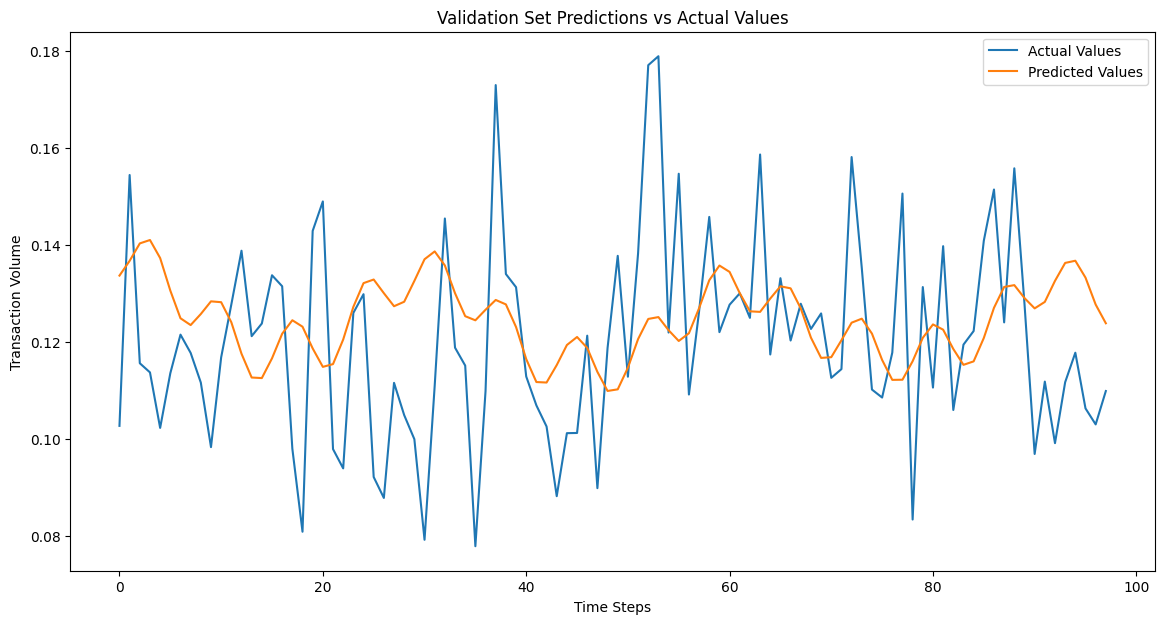

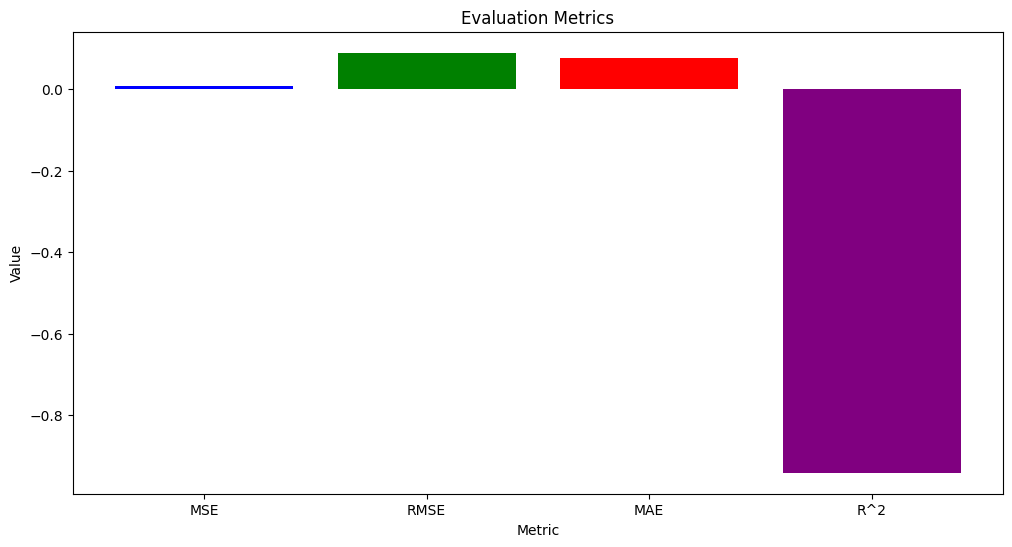

In [33]:
# Visualization
# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(last_val_y[:len(last_val_y)//15], label='Actual Values')
plt.plot(val_pred_2[:len(val_pred_2)//15], label='Predicted Values')
plt.title('Validation Set Predictions vs Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Volume')
plt.legend()
plt.show()

# Plot evaluation metrics as a bar chart
metrics = {'MSE': mse_val, 'RMSE': rmse_val, 'MAE': mae_val, 'R^2': r2_val}
plt.figure(figsize=(12, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

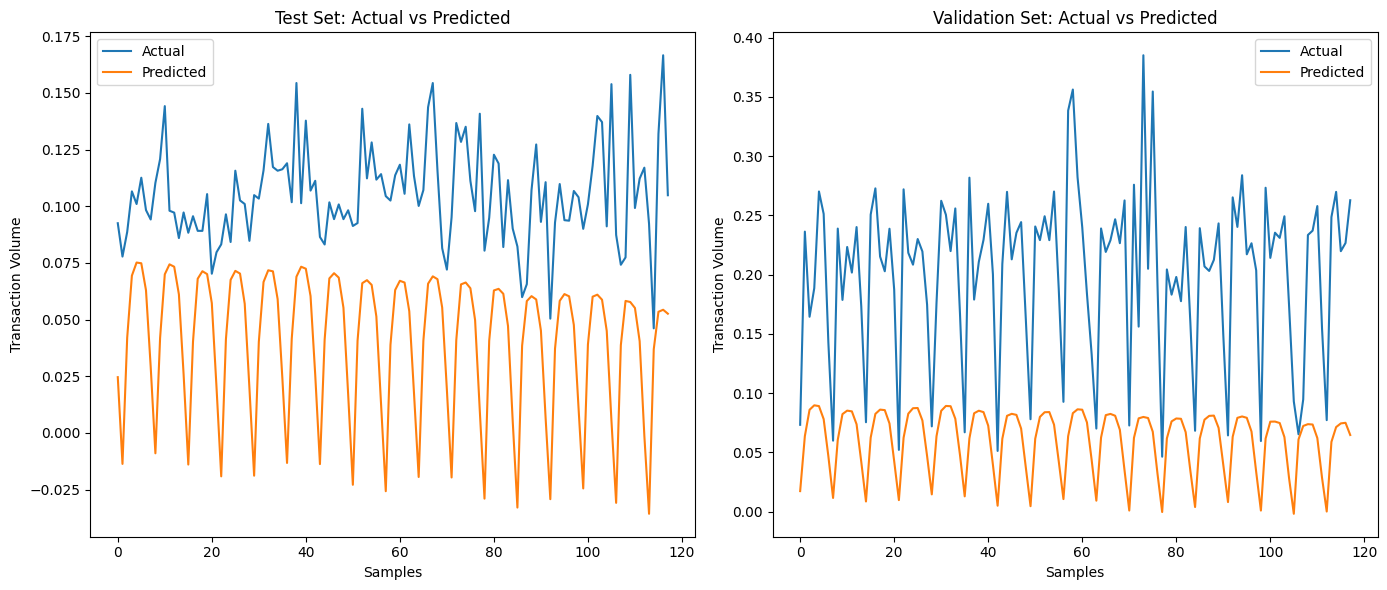

In [34]:
# Assuming you want to plot only the first half of the predictions
half_index = len(y_pred_2) // 15
y_pred_2_half = y_pred_2[:half_index]
test_y_2_half = test_y_2[:half_index]

# Optionally, you can plot the predictions vs. actuals for the test and validation sets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(test_y_2[:len(test_y_2)//15], label='Actual')
plt.plot(y_pred_2[:len(y_pred_2)//15], label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_y_2[:len(val_y_2)//15], label='Actual')
plt.plot(val_pred_2[:len(val_pred_2)//15], label='Predicted')
plt.title('Validation Set: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

plt.tight_layout()
plt.show()



## GRU

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences_gru(data, sequence_length, target_column='TransactionVolume'):
    data = pd.DataFrame(data, columns=data.columns)
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    features = np.array(features)
    target = np.array(target)

    X_gru, y_gru = [], []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length, :]
        X_gru.append(seq)
        y_gru.append(target[i + sequence_length])

    return np.array(X_gru), np.array(y_gru)

# Function to build a simplified GRU model with Dropout and fewer layers
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=30, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to perform cross-validation and model training
def cross_validate_and_train_gru(cluster_data, sequence_length, n_splits=5, epochs=50, batch_size=32):
    X_gru, y_gru = create_sequences_gru(cluster_data, sequence_length)

    tscv = TimeSeriesSplit(n_splits=n_splits)
    fold_metrics_gru = []
    last_val_idx_gru = None  # Initialize the last_val_idx
    last_val_X_gru = None
    last_val_y_gru = None

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_gru)):
        print(f"Training fold {fold + 1}/{n_splits}...")
        
        train_X_gru, val_X_gru = X_gru[train_idx], X_gru[val_idx]
        train_y_gru, val_y_gru = y_gru[train_idx], y_gru[val_idx]
        last_val_idx_gru = val_idx  # Update last_val_idx for each fold
        last_val_X_gru = val_X_gru
        last_val_y_gru = val_y_gru

        model_gru = build_gru_model((sequence_length, X_gru.shape[2]))

        # Define early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Fit the model with early stopping
        model_gru.fit(train_X_gru, train_y_gru, validation_data=(val_X_gru, val_y_gru), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

        # Make predictions on the validation set
        val_pred_gru = model_gru.predict(val_X_gru)

        # Calculate evaluation metrics for the validation set
        mse_val_gru = mean_squared_error(val_y_gru, val_pred_gru)
        rmse_val_gru = np.sqrt(mse_val_gru)
        mae_val_gru = mean_absolute_error(val_y_gru, val_pred_gru)
        r2_val_gru = r2_score(val_y_gru, val_pred_gru)

        print(f"Fold {fold + 1} Validation Set:")
        print(f"MSE: {mse_val_gru}")
        print(f"RMSE: {rmse_val_gru}")
        print(f"MAE: {mae_val_gru}")
        print(f"R^2: {r2_val_gru}")

        fold_metrics_gru.append({'mse': mse_val_gru, 'rmse': rmse_val_gru, 'mae': mae_val_gru, 'r2': r2_val_gru})

    return model_gru, fold_metrics_gru, X_gru, y_gru, last_val_idx_gru, last_val_X_gru, last_val_y_gru

# Create the clustered_data dictionary
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data_gru = {}
for cluster in clusters:
    clustered_data_gru[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column
for cluster, data in clustered_data_gru.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Scale the data
scaler_gru = MinMaxScaler(feature_range=(0, 1))
for cluster, data in clustered_data_gru.items():
    columns = data.columns  # Preserve the original column names
    data_scaled = scaler_gru.fit_transform(data)  # Scale all columns
    clustered_data_gru[cluster] = pd.DataFrame(data_scaled, columns=columns)  # Restore column names

# Set sequence length
sequence_length = 30

In [43]:
# Perform cross-validation and train model for cluster 0
model_gru, fold_metrics_gru, X_gru, y_gru, last_val_idx_gru, last_val_X_gru, last_val_y_gru = cross_validate_and_train_gru(clustered_data_gru[0], sequence_length)

Training fold 1/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0949 - val_loss: 0.0306
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0370 - val_loss: 0.0392
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0295 - val_loss: 0.0067
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0255 - val_loss: 0.0063
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - val_loss: 0.0345
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0165 - val_loss: 0.0534
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0157 - val_loss: 0.0447
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - val_loss: 0.0575
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - val_loss: 0.0663
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold 1 Validation Set:
MSE: 0.006333984665809575
RMSE: 0.07958633466751422
MAE: 0.06493541640954166
R^2: 0.15549928367444965
Training fold 2/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0358 - val_loss: 0.0432
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0393
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - val_loss: 0.0287
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - val_loss: 0.0275
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0385
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0181
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105 - val_loss: 0.0165
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - val_loss: 0.0110
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - val_loss: 0.0122
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - val_loss: 0.0111
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - val_loss: 0.0083

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0428 - val_loss: 0.0496
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - val_loss: 0.0337
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0134 - val_loss: 0.0436
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - val_loss: 0.0317
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0103
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - val_loss: 0.0098
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - val_loss: 0.0090
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - val_loss: 0.0096
Epoch 9/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 10/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 11/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - val_loss: 0.0090
Epoch 12/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0332 - val_loss: 0.0342
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - val_loss: 0.0350
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - val_loss: 0.0057
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - val_loss: 0.0047
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - val_loss: 0.0051
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - val_loss: 0.0057
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - val_loss: 0.0054
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold 4 Validation Set:
MSE: 0.004664872883109669
RMSE: 0.06829987469322084
MAE: 0.055208422092736874
R^2: -0.0963263236856029
Training fold 5/5...
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0380 - val_loss: 0.0041
Epoch 2/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0181 - val_loss: 0.0051
Epoch 3/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0108 - val_loss: 0.0260
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0083 - val_loss: 0.0245
Epoch 5/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0075 - val_loss: 0.0257
Epoch 6/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0073 - val_loss: 0.0306
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Fold 5 Validation Set:
MSE: 0.004095655008020228
RMSE: 0.06399730469340273
MAE: 0.04918642205044456
R^2: 0.0055970080612871564


In [44]:
# Test the model on the last fold's validation set as an example
val_pred_gru = model_gru.predict(last_val_X_gru)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
# Calculate and print evaluation metrics
mse_val_gru = mean_squared_error(last_val_y_gru, val_pred_gru)
rmse_val_gru = np.sqrt(mse_val_gru)
mae_val_gru = mean_absolute_error(last_val_y_gru, val_pred_gru)
r2_val_gru = r2_score(last_val_y_gru, val_pred_gru)

print("Evaluation Metrics for the Last Fold Validation Set (GRU):")
print(f"MSE: {mse_val_gru}")
print(f"RMSE: {rmse_val_gru}")
print(f"MAE: {mae_val_gru}")
print(f"R^2: {r2_val_gru}")

Evaluation Metrics for the Last Fold Validation Set (GRU):
MSE: 0.004095655008020228
RMSE: 0.06399730469340273
MAE: 0.04918642205044456
R^2: 0.0055970080612871564


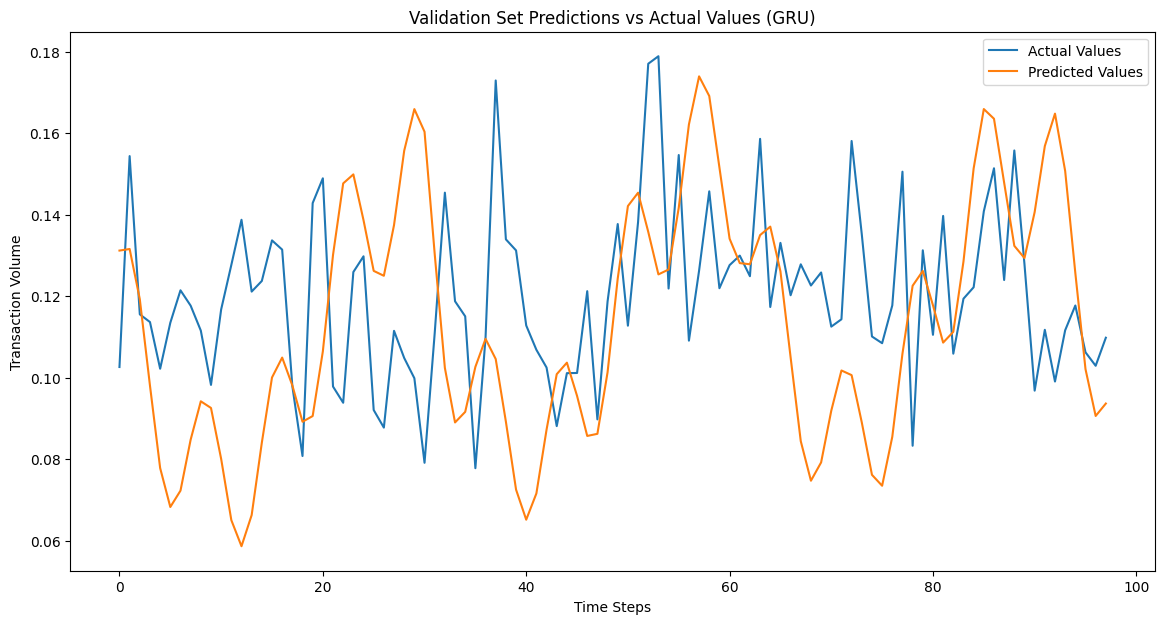

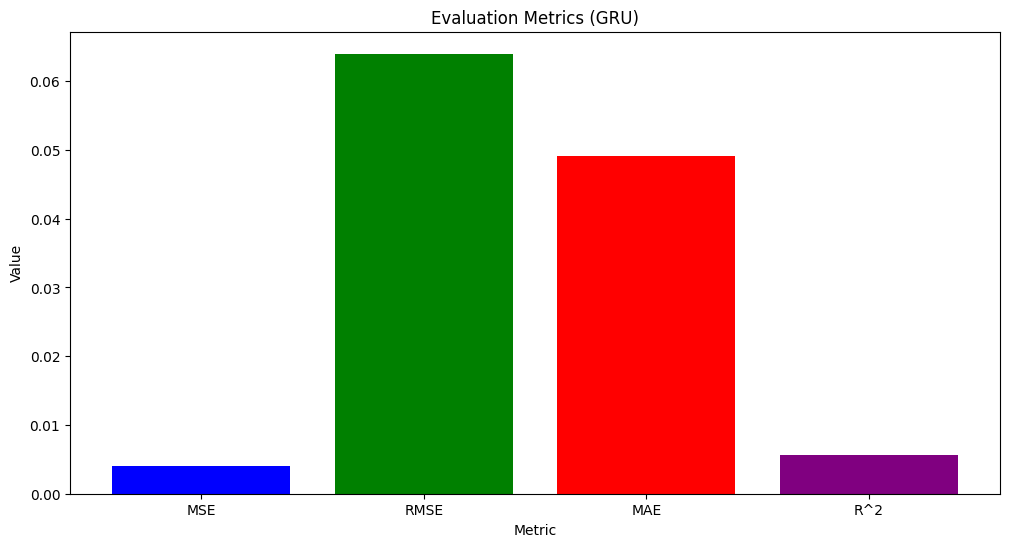

In [46]:
# Visualization
# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(last_val_y_gru[:len(last_val_y_gru)//15], label='Actual Values')
plt.plot(val_pred_gru[:len(val_pred_gru)//15], label='Predicted Values')
plt.title('Validation Set Predictions vs Actual Values (GRU)')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Volume')
plt.legend()
plt.show()

# Plot evaluation metrics as a bar chart
metrics_gru = {'MSE': mse_val_gru, 'RMSE': rmse_val_gru, 'MAE': mae_val_gru, 'R^2': r2_val_gru}
plt.figure(figsize=(12, 6))
plt.bar(metrics_gru.keys(), metrics_gru.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics (GRU)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

# Time Series models

## ARIMA

In [23]:
!pip3 install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00:00:010:01


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.metrics import smape
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

# Function to perform cross-validation and ARIMA model tuning
def cross_validate_and_train_arima(cluster_data, sequence_length, n_splits=5):
    # Extract target column
    target_column = 'TransactionVolume'
    target_data = cluster_data[target_column].values

    tscv = TimeSeriesSplit(n_splits=n_splits)
    fold_metrics_arima = []
    fold_forecasts = []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(target_data)):
        print(f"Training fold {fold + 1}/{n_splits}...")

        train_data, val_data = target_data[train_idx], target_data[val_idx]

        # Non-seasonal ARIMA model tuning
        model_arima = auto_arima(train_data, seasonal=False, trace=True, 
                                 error_action='ignore', suppress_warnings=True, stepwise=True)

        # Forecasting
        n_forecast = len(val_data)
        forecast = model_arima.predict(n_periods=n_forecast)

        # Calculate evaluation metrics
        mse_val_arima = mean_squared_error(val_data, forecast)
        rmse_val_arima = np.sqrt(mse_val_arima)
        mae_val_arima = mean_absolute_error(val_data, forecast)
        r2_val_arima = r2_score(val_data, forecast)

        print(f"Fold {fold + 1} Validation Set:")
        print(f"MSE: {mse_val_arima}")
        print(f"RMSE: {rmse_val_arima}")
        print(f"MAE: {mae_val_arima}")
        print(f"R^2: {r2_val_arima}")

        fold_metrics_arima.append({'mse': mse_val_arima, 'rmse': rmse_val_arima, 'mae': mae_val_arima, 'r2': r2_val_arima})
        fold_forecasts.append(forecast)

    return model_arima, fold_metrics_arima, fold_forecasts

# Create the clustered_data dictionary (same as before)
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data_arima = {}
for cluster in clusters:
    clustered_data_arima[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column (same as before)
for cluster, data in clustered_data_arima.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Scale the data (same as before)
scaler_arima = MinMaxScaler(feature_range=(0, 1))
for cluster, data in clustered_data_arima.items():
    columns = data.columns  # Preserve the original column names
    data_scaled = scaler_arima.fit_transform(data)  # Scale all columns
    clustered_data_arima[cluster] = pd.DataFrame(data_scaled, columns=columns)  # Restore column names

# Set sequence length (same as before)
sequence_length = 30

In [25]:
# Perform cross-validation and train non-seasonal ARIMA model for cluster 0
model_arima, fold_metrics_arima, fold_forecasts = cross_validate_and_train_arima(clustered_data_arima[0], sequence_length)

Training fold 1/5...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3530.051, Time=3.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3079.330, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3253.684, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3475.146, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3081.329, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3531.530, Time=2.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3533.511, Time=0.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3531.527, Time=2.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3530.176, Time=0.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3529.522, Time=2.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3535.488, Time=0.72 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3477.134, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3533.506, Time=1.18 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-3533.503, Time=1.17 se

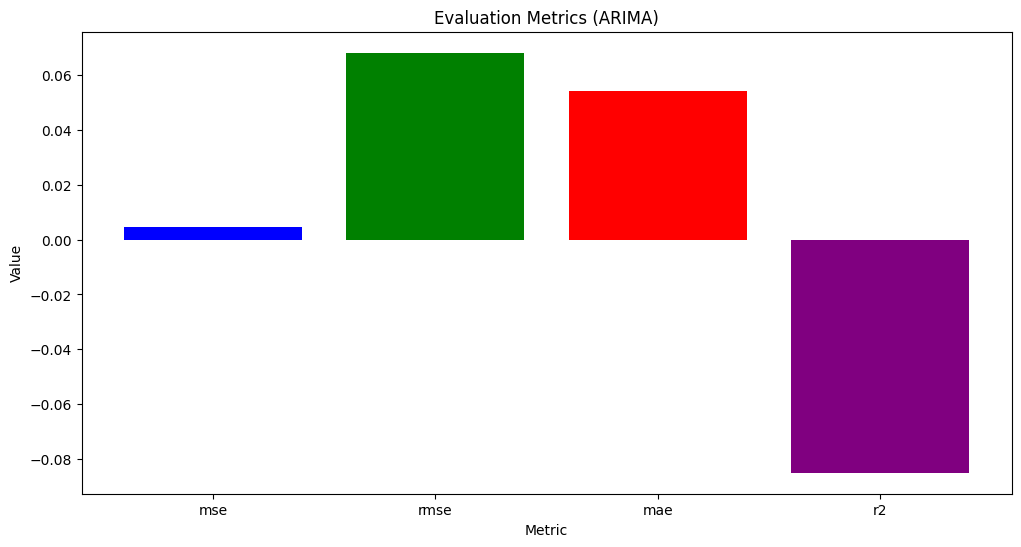

In [26]:
# Example of plotting metrics for ARIMA
metrics_arima = fold_metrics_arima[3]  # Using metrics from the first fold as example
plt.figure(figsize=(12, 6))
plt.bar(metrics_arima.keys(), metrics_arima.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics (ARIMA)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

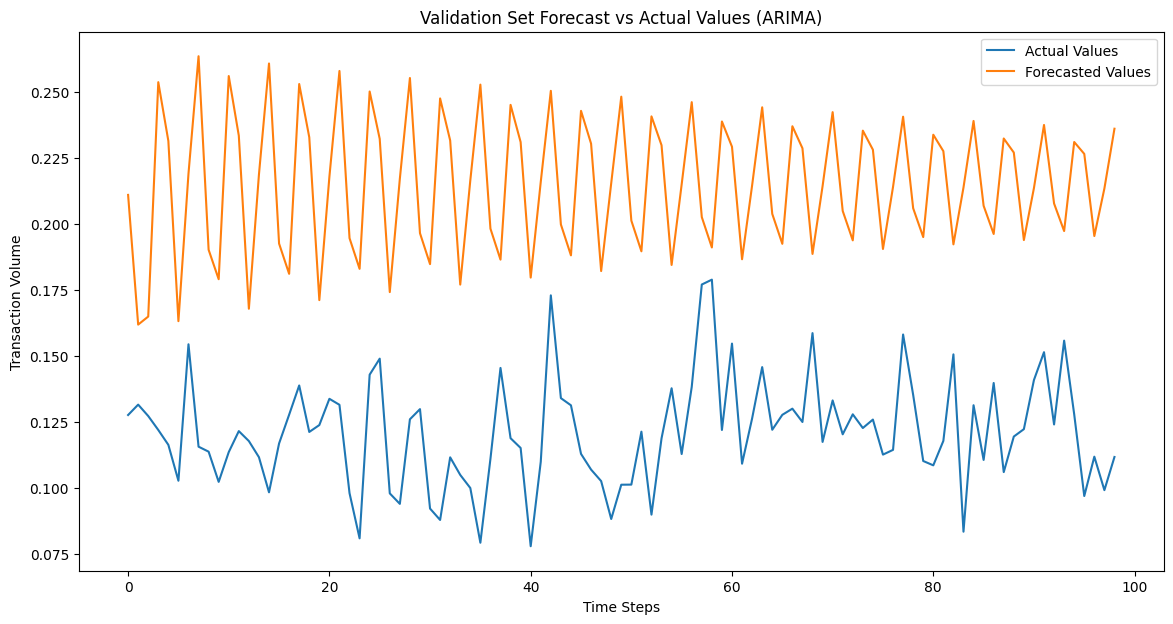

In [29]:
# Example of plotting predictions vs actual values for the second fold (ARIMA)
second_fold_index = 3  # Using the second fold (index 1)
cluster = list(clustered_data_arima.keys())[0]  # Select the first cluster (or any cluster you want)

# Get the actual validation data and forecast for the second fold
val_data = clustered_data_arima[cluster]['TransactionVolume'].values[len(clustered_data_arima[cluster]) - len(fold_forecasts[second_fold_index]):]
forecast = fold_forecasts[second_fold_index]

# Plot the results for the second fold
plt.figure(figsize=(14, 7))
plt.plot(val_data[:len(val_data)//15], label='Actual Values')
plt.plot(forecast[:len(forecast)//15], label='Forecasted Values')
plt.title(f'Validation Set Forecast vs Actual Values (ARIMA)')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Volume')
plt.legend()
plt.show()

## SARIMA

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.metrics import smape
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

# Function to perform cross-validation and SARIMA model tuning
def cross_validate_and_train_sarima(cluster_data, sequence_length, n_splits=5):
    # Extract target column
    target_column = 'TransactionVolume'
    target_data = cluster_data[target_column].values

    tscv = TimeSeriesSplit(n_splits=n_splits)
    fold_metrics_sarima = []
    fold_forecasts = []

    for fold, (train_idx, val_idx) in enumerate(tscv.split(target_data)):
        print(f"Training fold {fold + 1}/{n_splits}...")

        train_data, val_data = target_data[train_idx], target_data[val_idx]

        # Auto SARIMA model tuning (seasonal=True)
        model_sarima = auto_arima(train_data, seasonal=True, m=7, trace=True, error_action='ignore', 
                                  suppress_warnings=True, stepwise=True)

        # Forecasting
        n_forecast = len(val_data)
        forecast = model_sarima.predict(n_periods=n_forecast)

        # Calculate evaluation metrics
        mse_val_sarima = mean_squared_error(val_data, forecast)
        rmse_val_sarima = np.sqrt(mse_val_sarima)
        mae_val_sarima = mean_absolute_error(val_data, forecast)
        r2_val_sarima = r2_score(val_data, forecast)

        print(f"Fold {fold + 1} Validation Set:")
        print(f"MSE: {mse_val_sarima}")
        print(f"RMSE: {rmse_val_sarima}")
        print(f"MAE: {mae_val_sarima}")
        print(f"R^2: {r2_val_sarima}")

        fold_metrics_sarima.append({'mse': mse_val_sarima, 'rmse': rmse_val_sarima, 'mae': mae_val_sarima, 'r2': r2_val_sarima})
        fold_forecasts.append(forecast)

    return model_sarima, fold_metrics_sarima, fold_forecasts

# Create the clustered_data dictionary (same as before)
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data_sarima = {}
for cluster in clusters:
    clustered_data_sarima[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column (same as before)
for cluster, data in clustered_data_sarima.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Scale the data (same as before)
scaler_sarima = MinMaxScaler(feature_range=(0, 1))
for cluster, data in clustered_data_sarima.items():
    columns = data.columns  # Preserve the original column names
    data_scaled = scaler_sarima.fit_transform(data)  # Scale all columns
    clustered_data_sarima[cluster] = pd.DataFrame(data_scaled, columns=columns)  # Restore column names

# Set sequence length (same as before)
sequence_length = 30

In [31]:
# Perform cross-validation and train model for cluster 0 (SARIMA)
model_sarima, fold_metrics_sarima, fold_forecasts = cross_validate_and_train_sarima(clustered_data_sarima[0], sequence_length)

Training fold 1/5...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=10.66 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-3079.330, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-3506.763, Time=1.43 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-3570.299, Time=2.25 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-3081.329, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-3475.146, Time=0.28 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=-3949.449, Time=5.31 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=-3630.408, Time=1.71 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=-3947.063, Time=7.67 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=-3923.859, Time=8.92 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=-3648.611, Time=3.47 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=-3740.527, Time=8.00 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=-3921.346, Time=10.01 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-3714.860, Time=4.51 sec
 A

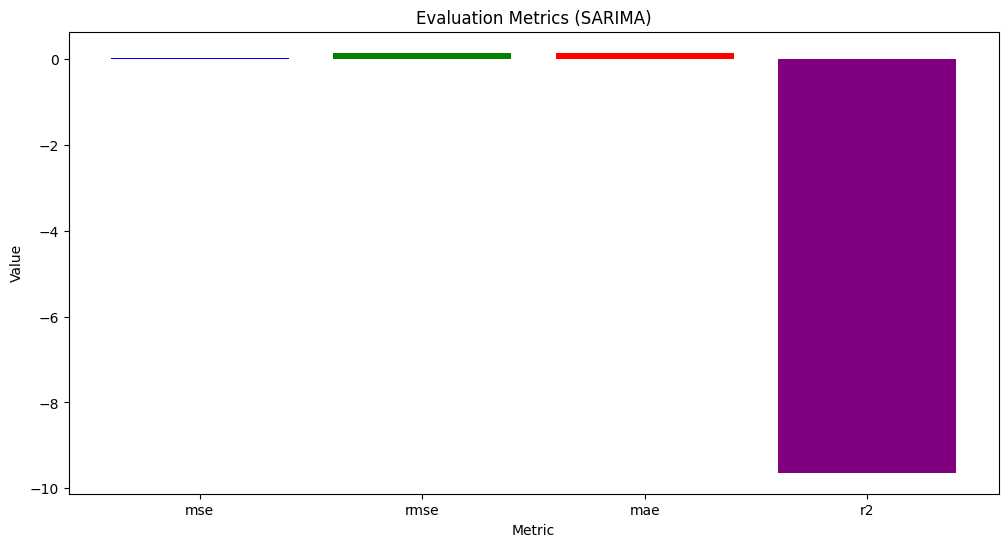

In [32]:
# Example of plotting metrics for SARIMA
metrics_sarima = fold_metrics_sarima[1]  # Using metrics from the first fold as example
plt.figure(figsize=(12, 6))
plt.bar(metrics_sarima.keys(), metrics_sarima.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Evaluation Metrics (SARIMA)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

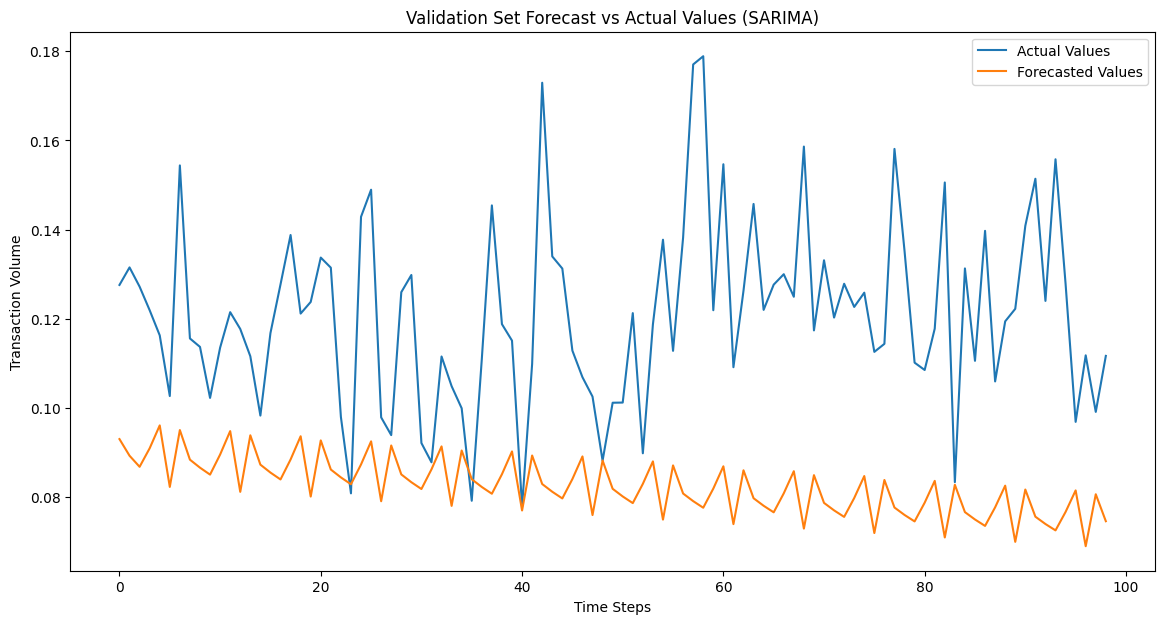

In [33]:
# Example of plotting predictions vs actual values for the second fold (SARIMA)
second_fold_index = 1  # Using the second fold (index 1)
cluster = list(clustered_data_sarima.keys())[0]  # Select the first cluster (or any cluster you want)

# Get the actual validation data and forecast for the second fold
val_data = clustered_data_sarima[cluster]['TransactionVolume'].values[len(clustered_data_sarima[cluster]) - len(fold_forecasts[second_fold_index]):]
forecast = fold_forecasts[second_fold_index]

# Plot the results for the second fold
plt.figure(figsize=(14, 7))
plt.plot(val_data[:len(val_data)//15], label='Actual Values')
plt.plot(forecast[:len(forecast)//15], label='Forecasted Values')
plt.title(f'Validation Set Forecast vs Actual Values (SARIMA)')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Volume')
plt.legend()
plt.show()

# Machine Learning models

## XGBoost

In [14]:
!pip3 install optuna

In [15]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sequence_length = 30

# If you're not clustering, use the entire dataset
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data = {}
for cluster in clusters:
    clustered_data[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column
for cluster, data in clustered_data.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Function to create sequences (for time series)
def create_sequences(data, sequence_length, target_column='TransactionVolume'):
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    features = np.array(features)
    target = np.array(target)

    X, y = [], []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length, :].flatten()
        X.append(seq)
        y.append(target[i + sequence_length])

    return np.array(X), np.array(y)

# Objective function for Optuna hyperparameter optimization
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    # Use the entire data if not clustering
    X, y = create_sequences(clustered_data[0], sequence_length)
    train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.4, random_state=42)
    val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)

    # Train the model with the suggested hyperparameters
    model = xgb.XGBRegressor(**params)
    model.fit(train_X, train_y, eval_set=[(val_X, val_y)], verbose=False)

    # Predict and calculate the validation RMSE
    y_pred = model.predict(val_X)
    val_mse = mean_squared_error(val_y, y_pred)
    val_rmse = np.sqrt(val_mse)

    return val_rmse

# Step 1: Hyperparameter Optimization with Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

# Step 2: Get the Best Hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Step 3: Train Final Model with Best Hyperparameters
X, y = create_sequences(clustered_data[0], sequence_length)
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.4, random_state=42)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)

final_model = xgb.XGBRegressor(**best_params)
final_model.fit(train_X, train_y, eval_set=[(val_X, val_y)], verbose=True)

# Extract feature importances
feature_importances = final_model.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                 'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                 'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores
features_with_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print the features with their importance scores
print("Feature importances:")
for feature, importance in features_with_importance:
    print(f"{feature}: {importance:.4f}")


[I 2024-09-09 04:19:40,528] A new study created in memory with name: no-name-c27d3cfb-8401-4714-9840-b9652ed18398
/tmp/ipykernel_34/3883012894.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
/tmp/ipykernel_34/3883012894.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
/tmp/ipykernel_34/3883012894.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rat

Best hyperparameters: {'n_estimators': 293, 'max_depth': 4, 'learning_rate': 0.09925740583852907, 'subsample': 0.999498170481692, 'colsample_bytree': 0.713318981365728, 'gamma': 6.804512622459077, 'reg_alpha': 1.758653252170168, 'reg_lambda': 6.746865006823839}
[0]	validation_0-rmse:7315.20797
[1]	validation_0-rmse:6786.24310
[2]	validation_0-rmse:6329.09935
[3]	validation_0-rmse:5922.99447
[4]	validation_0-rmse:5552.35495
[5]	validation_0-rmse:5218.52813
[6]	validation_0-rmse:4939.65781
[7]	validation_0-rmse:4681.80980
[8]	validation_0-rmse:4460.98563
[9]	validation_0-rmse:4269.37147
[10]	validation_0-rmse:4097.53831
[11]	validation_0-rmse:3913.98696
[12]	validation_0-rmse:3763.44655
[13]	validation_0-rmse:3633.02470
[14]	validation_0-rmse:3520.90167
[15]	validation_0-rmse:3420.49029
[16]	validation_0-rmse:3318.54004
[17]	validation_0-rmse:3233.58154
[18]	validation_0-rmse:3164.50719
[19]	validation_0-rmse:3097.85972
[20]	validation_0-rmse:3035.10413
[21]	validation_0-rmse:2985.99227


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


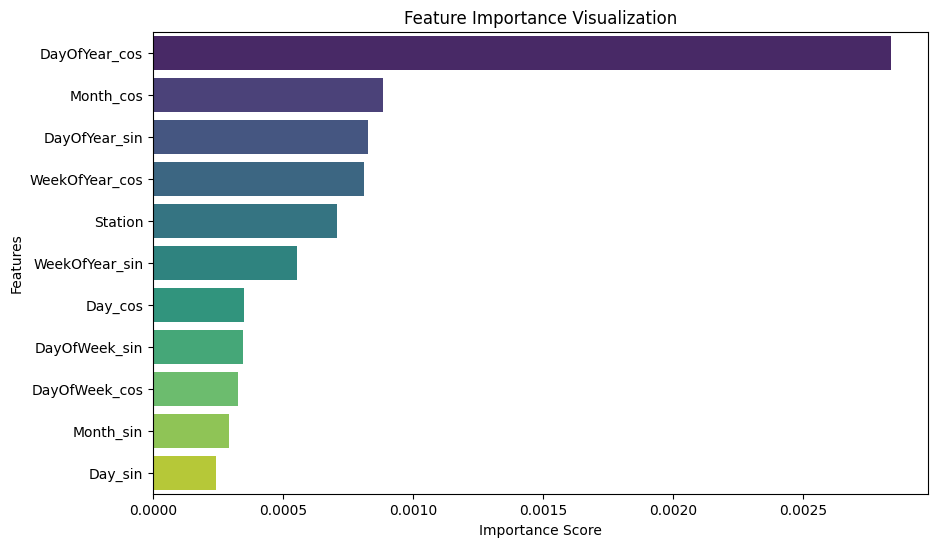

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = final_model.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                 'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                 'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores and sort them
features_with_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Unzip the sorted features and their importance scores
sorted_features, sorted_importances = zip(*features_with_importance)

# Convert to lists if not already
sorted_importances = list(sorted_importances)
sorted_features = list(sorted_features)

# Plotting the feature importances using sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")

# Adding labels and title
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Visualization')
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you want the top 7 features
top_features = ['DayOfYear_cos', 'DayOfYear_sin', 'Station','WeekOfYear_cos' ,'Month_cos']

# Filter the DataFrame
df_filtered = df_aggregated_with_cyclic[top_features + ['TransactionVolume']]

# Create sequences with filtered features
X, y = create_sequences(df_filtered, sequence_length)
# Split data
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.4, random_state=42)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=42)

# Train the model with top features
final_model_xgb = xgb.XGBRegressor(**best_params)
final_model_xgb.fit(train_X, train_y, eval_set=[(val_X, val_y)], verbose=True)


# Step 4: Evaluate the Final Model
# For validation set
val_pred = final_model_xgb.predict(val_X)
val_mse = mean_squared_error(val_y, val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(val_y, val_pred)
val_r2 = r2_score(val_y, val_pred)

print('Validation Set :')
print(f"Validation MSE: {val_mse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation MAE: {val_mae}")
print(f"Validation R2: {val_r2}")

# For test set
test_pred = final_model_xgb.predict(test_X)
test_mse = mean_squared_error(test_y, test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(test_y, test_pred)
test_r2 = r2_score(test_y, test_pred)

print('Test Set :')
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")

[0]	validation_0-rmse:7321.56926
[1]	validation_0-rmse:6800.01162
[2]	validation_0-rmse:6343.67347
[3]	validation_0-rmse:5947.66548
[4]	validation_0-rmse:5580.11841
[5]	validation_0-rmse:5258.98548
[6]	validation_0-rmse:4976.29139
[7]	validation_0-rmse:4732.85339
[8]	validation_0-rmse:4526.20064
[9]	validation_0-rmse:4347.33112
[10]	validation_0-rmse:4196.80619
[11]	validation_0-rmse:4066.28404
[12]	validation_0-rmse:3953.48648
[13]	validation_0-rmse:3857.81220
[14]	validation_0-rmse:3759.84897
[15]	validation_0-rmse:3673.85394
[16]	validation_0-rmse:3617.26057
[17]	validation_0-rmse:3549.95210
[18]	validation_0-rmse:3495.12091
[19]	validation_0-rmse:3454.53827
[20]	validation_0-rmse:3412.19721
[21]	validation_0-rmse:3384.25586
[22]	validation_0-rmse:3353.16259
[23]	validation_0-rmse:3333.18439
[24]	validation_0-rmse:3309.52926
[25]	validation_0-rmse:3285.02868
[26]	validation_0-rmse:3269.26274
[27]	validation_0-rmse:3248.63823
[28]	validation_0-rmse:3232.77219
[29]	validation_0-rmse:3

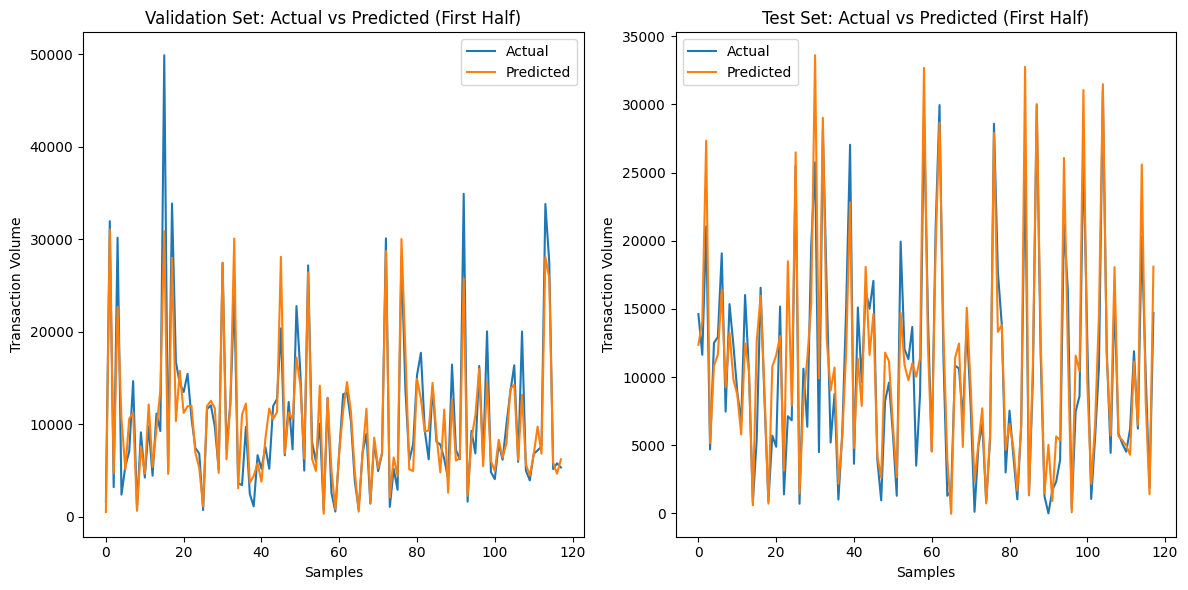

In [19]:
import matplotlib.pyplot as plt

# Step 5: Plot Predictions vs Actual
plt.figure(figsize=(12, 6))

# Plot Validation Predictions vs Actual (First Half)
plt.subplot(1, 2, 1)
plt.plot(val_y[:len(val_y)//15], label='Actual')
plt.plot(val_pred[:len(val_pred)//15], label='Predicted')
plt.title('Validation Set: Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

# Plot Test Predictions vs Actual (First Half)
plt.subplot(1, 2, 2)
plt.plot(test_y[:len(test_y)//15], label='Actual')
plt.plot(test_pred[:len(test_pred)//15], label='Predicted')
plt.title('Test Set: Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

plt.tight_layout()
plt.show()


In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example of predicting a future date
station_id = 4  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-07-09')  # The future date you want to predict

# Calculate the cyclic features for the future date
future_data = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'WeekOfYear_sin': np.sin(2 * np.pi * prediction_date.weekofyear / 52),
    'Station': station_id,
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
    'Month_cos': np.cos(2 * np.pi * prediction_date.month / 12),
}

# Create a sequence by repeating the same features for the required sequence length
sequence_length = 30  # Update this to match your sequence length during training
future_sequence = pd.DataFrame([future_data] * sequence_length)

# Flatten and reshape to match the model input format
input_sequence = future_sequence.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date
predicted_volume = final_model_xgb.predict(input_sequence)

print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()}: {predicted_volume[0]}")


Predicted Transaction Volume for Station 4 on 2024-07-09: 5785.1630859375


## Random Forest

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import optuna

sequence_length = 30

# If you're not clustering, use the entire dataset
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data_rf = {}
for cluster in clusters:
    clustered_data_rf[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column
for cluster, data in clustered_data_rf.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Function to create sequences (for time series)
def create_sequences_rf(data, sequence_length, target_column='TransactionVolume'):
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    features = np.array(features)
    target = np.array(target)

    X_rf, y_rf = [], []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length, :].flatten()
        X_rf.append(seq)
        y_rf.append(target[i + sequence_length])

    return np.array(X_rf), np.array(y_rf)

# Objective function for Optuna hyperparameter optimization
def objective_rf(trial):
    params_rf = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0)
    }

    # Use the entire data if not clustering
    X_rf, y_rf = create_sequences_rf(clustered_data_rf[0], sequence_length)
    train_X_rf, temp_X_rf, train_y_rf, temp_y_rf = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)
    val_X_rf, test_X_rf, val_y_rf, test_y_rf = train_test_split(temp_X_rf, temp_y_rf, test_size=0.5, random_state=42)

    # Train the model with the suggested hyperparameters
    model_rf = RandomForestRegressor(**params_rf)
    model_rf.fit(train_X_rf, train_y_rf)

    # Predict and calculate the validation RMSE
    y_pred_rf = model_rf.predict(val_X_rf)
    val_mse_rf = mean_squared_error(val_y_rf, y_pred_rf)
    val_rmse_rf = np.sqrt(val_mse_rf)

    return val_rmse_rf

# Step 1: Hyperparameter Optimization with Optuna
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=100, n_jobs=-1)

# Step 2: Get the Best Hyperparameters
best_params_rf = study_rf.best_params
print("Best hyperparameters for Random Forest:", best_params_rf)

# Step 3: Train Final Random Forest Model with Best Hyperparameters
X_rf, y_rf = create_sequences_rf(clustered_data_rf[0], sequence_length)
train_X_rf, temp_X_rf, train_y_rf, temp_y_rf = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)
val_X_rf, test_X_rf, val_y_rf, test_y_rf = train_test_split(temp_X_rf, temp_y_rf, test_size=0.5, random_state=42)

final_model_rf = RandomForestRegressor(**best_params_rf)
final_model_rf.fit(train_X_rf, train_y_rf)

# Extract feature importances
feature_importances_rf = final_model_rf.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names_rf = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                 'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                 'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores
features_with_importance_rf = sorted(zip(feature_names_rf, feature_importances_rf), key=lambda x: x[1], reverse=True)

# Print the features with their importance scores
print("Random Forest Feature importances:")
for feature_rf, importance_rf in features_with_importance_rf:
    print(f"{feature_rf}: {importance_rf:.4f}")


[I 2024-09-09 04:34:09,586] A new study created in memory with name: no-name-5c72988f-786b-4936-9774-fbdbe06e218b
[I 2024-09-09 04:34:18,722] Trial 0 finished with value: 3448.1989476426043 and parameters: {'n_estimators': 141, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 0.2521750784971045}. Best is trial 0 with value: 3448.1989476426043.
[I 2024-09-09 04:34:33,064] Trial 4 finished with value: 3819.618380921831 and parameters: {'n_estimators': 226, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 0.3605220980983286}. Best is trial 0 with value: 3448.1989476426043.
[I 2024-09-09 04:34:34,205] Trial 2 finished with value: 2688.5603583316924 and parameters: {'n_estimators': 136, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 0.23691550626671504}. Best is trial 2 with value: 2688.5603583316924.
[I 2024-09-09 04:34:50,868] Trial 1 finished with value: 2569.786615667179 and parameters: {'n_esti

Best hyperparameters for Random Forest: {'n_estimators': 474, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 0.8496320639560068}
Random Forest Feature importances:
DayOfYear_cos: 0.0072
Station: 0.0013
DayOfYear_sin: 0.0009
DayOfWeek_cos: 0.0003
Day_sin: 0.0003
WeekOfYear_cos: 0.0002
Month_cos: 0.0002
Day_cos: 0.0001
DayOfWeek_sin: 0.0001
WeekOfYear_sin: 0.0001
Month_sin: 0.0000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


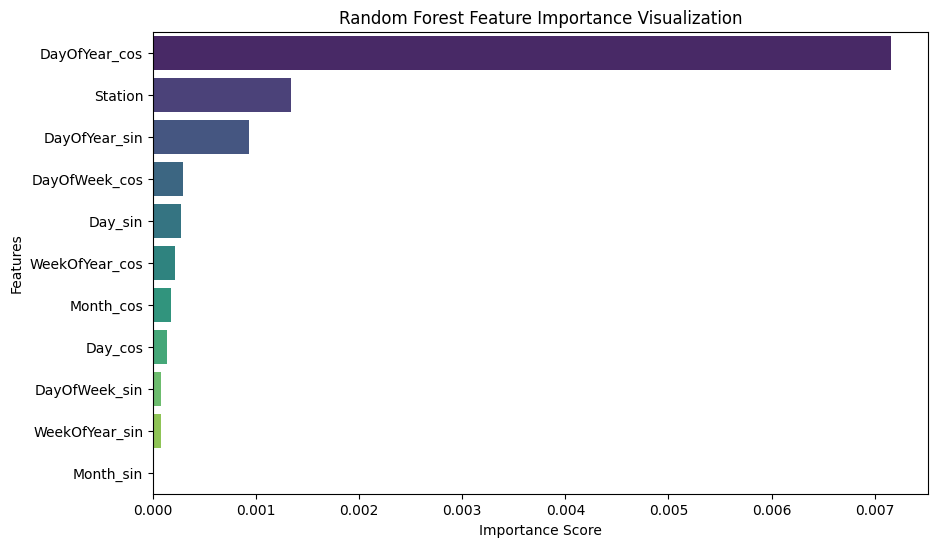

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances from the Random Forest model
feature_importances_rf = final_model_rf.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names_rf = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                    'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                    'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores and sort them
features_with_importance_rf = sorted(zip(feature_names_rf, feature_importances_rf), key=lambda x: x[1], reverse=True)

# Unzip the sorted features and their importance scores
sorted_features_rf, sorted_importances_rf = zip(*features_with_importance_rf)

# Convert to lists if not already
sorted_importances_rf = list(sorted_importances_rf)
sorted_features_rf = list(sorted_features_rf)

# Plotting the feature importances using sns.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_rf, y=sorted_features_rf, palette="viridis")

# Adding labels and title
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance Visualization')
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you want the top 7 features
top_features_rf = ['DayOfYear_cos', 'DayOfYear_sin', 'Station', 'Day_sin', 'DayOfWeek_cos']

# Filter the DataFrame
df_filtered_rf = df_aggregated_with_cyclic[top_features_rf + ['TransactionVolume']]

# Create sequences with filtered features for Random Forest
X_rf, y_rf = create_sequences_rf(df_filtered_rf, sequence_length)

# Split data
train_X_rf, temp_X_rf, train_y_rf, temp_y_rf = train_test_split(X_rf, y_rf, test_size=0.4, random_state=42)
val_X_rf, test_X_rf, val_y_rf, test_y_rf = train_test_split(temp_X_rf, temp_y_rf, test_size=0.5, random_state=42)

# Train the Random Forest model with top features
final_model_rf = RandomForestRegressor(**best_params_rf)
final_model_rf.fit(train_X_rf, train_y_rf)

# Step 4: Evaluate the Final Model
# For validation set
val_pred_rf = final_model_rf.predict(val_X_rf)
val_mse_rf = mean_squared_error(val_y_rf, val_pred_rf)
val_rmse_rf = np.sqrt(val_mse_rf)
val_mae_rf = mean_absolute_error(val_y_rf, val_pred_rf)
val_r2_rf = r2_score(val_y_rf, val_pred_rf)

print('Validation Set (Random Forest):')
print(f"Validation MSE: {val_mse_rf}")
print(f"Validation RMSE: {val_rmse_rf}")
print(f"Validation MAE: {val_mae_rf}")
print(f"Validation R2: {val_r2_rf}")

# For test set
test_pred_rf = final_model_rf.predict(test_X_rf)
test_mse_rf = mean_squared_error(test_y_rf, test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_mae_rf = mean_absolute_error(test_y_rf, test_pred_rf)
test_r2_rf = r2_score(test_y_rf, test_pred_rf)

print('Test Set (Random Forest):')
print(f"Test MSE: {test_mse_rf}")
print(f"Test RMSE: {test_rmse_rf}")
print(f"Test MAE: {test_mae_rf}")
print(f"Test R2: {test_r2_rf}")


Validation Set (Random Forest):
Validation MSE: 6545981.628138712
Validation RMSE: 2558.511604065675
Validation MAE: 1669.4829915466412
Validation R2: 0.8953855956854684
Test Set (Random Forest):
Test MSE: 7837719.634722865
Test RMSE: 2799.5927623000575
Test MAE: 1779.8447628545248
Test R2: 0.8834766968673744


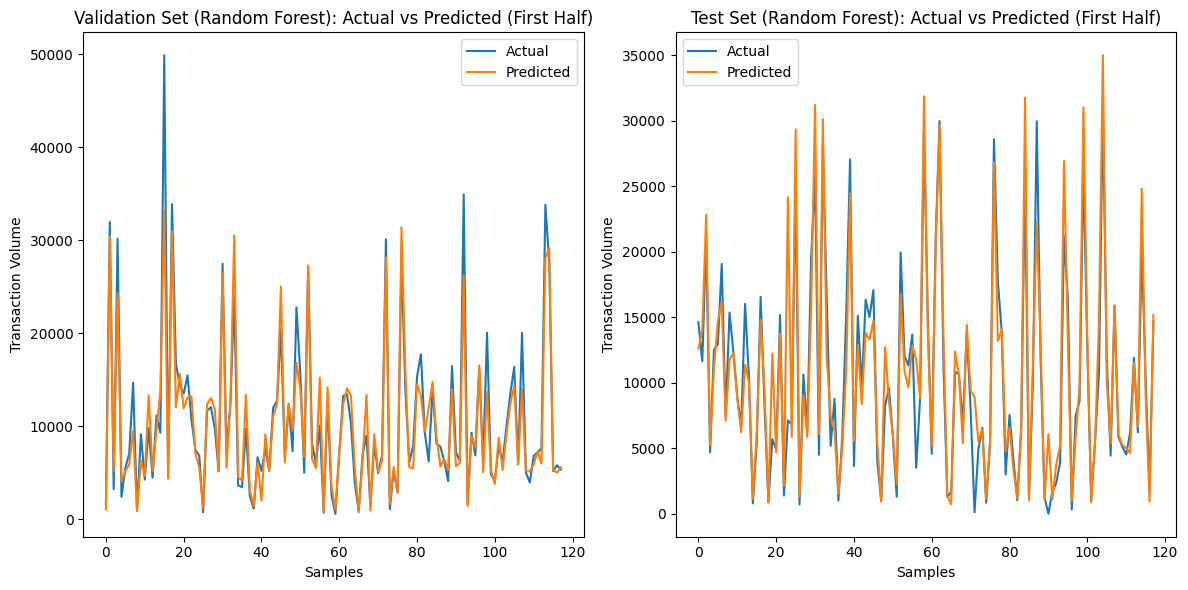

In [23]:
import matplotlib.pyplot as plt

# Step 5: Plot Predictions vs Actual for Random Forest
plt.figure(figsize=(12, 6))

# Plot Validation Predictions vs Actual (First Half) for Random Forest
plt.subplot(1, 2, 1)
plt.plot(val_y_rf[:len(val_y_rf)//15], label='Actual')
plt.plot(val_pred_rf[:len(val_pred_rf)//15], label='Predicted')
plt.title('Validation Set (Random Forest): Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

# Plot Test Predictions vs Actual (First Half) for Random Forest
plt.subplot(1, 2, 2)
plt.plot(test_y_rf[:len(test_y_rf)//15], label='Actual')
plt.plot(test_pred_rf[:len(test_pred_rf)//15], label='Predicted')
plt.title('Test Set (Random Forest): Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

plt.tight_layout()
plt.show()


In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example of predicting a future date using Random Forest
station_id = 6  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-07-09')  # The future date you want to predict

# Calculate the cyclic features for the future date
future_data_rf = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_sin': np.sin(2 * np.pi * prediction_date.day / 31),
    'DayOfWeek_cos': np.cos(2 * np.pi * prediction_date.dayofweek / 7),
}

# Create a sequence by repeating the same features for the required sequence length
sequence_length = 30  # Update this to match your sequence length during training
future_sequence_rf = pd.DataFrame([future_data_rf] * sequence_length)

# Flatten and reshape to match the model input format
input_sequence_rf = future_sequence_rf.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using Random Forest
predicted_volume_rf = final_model_rf.predict(input_sequence_rf)

print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Random Forest): {predicted_volume_rf[0]}")


Predicted Transaction Volume for Station 6 on 2024-07-09 (Random Forest): 5081.056082271541


## GBM

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import optuna

sequence_length = 30

# If you're not clustering, use the entire dataset
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data_gbm = {}
for cluster in clusters:
    clustered_data_gbm[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column
for cluster, data in clustered_data_gbm.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Function to create sequences (for time series)
def create_sequences_gbm(data, sequence_length, target_column='TransactionVolume'):
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    features = np.array(features)
    target = np.array(target)

    X_gbm, y_gbm = [], []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length, :].flatten()
        X_gbm.append(seq)
        y_gbm.append(target[i + sequence_length])

    return np.array(X_gbm), np.array(y_gbm)

# Objective function for Optuna hyperparameter optimization
def objective_gbm(trial):
    params_gbm = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0)
    }

    # Use the entire data if not clustering
    X_gbm, y_gbm = create_sequences_gbm(clustered_data_gbm[0], sequence_length)
    train_X_gbm, temp_X_gbm, train_y_gbm, temp_y_gbm = train_test_split(X_gbm, y_gbm, test_size=0.4, random_state=42)
    val_X_gbm, test_X_gbm, val_y_gbm, test_y_gbm = train_test_split(temp_X_gbm, temp_y_gbm, test_size=0.5, random_state=42)

    # Train the model with the suggested hyperparameters
    model_gbm = GradientBoostingRegressor(**params_gbm)
    model_gbm.fit(train_X_gbm, train_y_gbm)

    # Predict and calculate the validation RMSE
    y_pred_gbm = model_gbm.predict(val_X_gbm)
    val_mse_gbm = mean_squared_error(val_y_gbm, y_pred_gbm)
    val_rmse_gbm = np.sqrt(val_mse_gbm)

    return val_rmse_gbm

# Step 1: Hyperparameter Optimization with Optuna
study_gbm = optuna.create_study(direction='minimize')
study_gbm.optimize(objective_gbm, n_trials=100, n_jobs=-1)

# Step 2: Get the Best Hyperparameters
best_params_gbm = study_gbm.best_params
print("Best hyperparameters for Gradient Boosting Machine:", best_params_gbm)

# Step 3: Train Final Gradient Boosting Model with Best Hyperparameters
X_gbm, y_gbm = create_sequences_gbm(clustered_data_gbm[0], sequence_length)
train_X_gbm, temp_X_gbm, train_y_gbm, temp_y_gbm = train_test_split(X_gbm, y_gbm, test_size=0.4, random_state=42)
val_X_gbm, test_X_gbm, val_y_gbm, test_y_gbm = train_test_split(temp_X_gbm, temp_y_gbm, test_size=0.5, random_state=42)

final_model_gbm = GradientBoostingRegressor(**best_params_gbm)
final_model_gbm.fit(train_X_gbm, train_y_gbm)

# Extract feature importances
feature_importances_gbm = final_model_gbm.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names_gbm = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                     'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                     'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores
features_with_importance_gbm = sorted(zip(feature_names_gbm, feature_importances_gbm), key=lambda x: x[1], reverse=True)

# Print the features with their importance scores
print("Gradient Boosting Machine Feature importances:")
for feature_gbm, importance_gbm in features_with_importance_gbm:
    print(f"{feature_gbm}: {importance_gbm:.4f}")


[I 2024-09-09 05:30:50,190] A new study created in memory with name: no-name-487defa9-e485-4a1a-a945-1a130fa97560
/tmp/ipykernel_34/486763337.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
/tmp/ipykernel_34/486763337.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
/tmp/ipykernel_34/486763337.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate':

Best hyperparameters for Gradient Boosting Machine: {'n_estimators': 274, 'learning_rate': 0.096498063321636, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 1, 'subsample': 0.9957323089968961, 'max_features': 0.8170881382281487}
Gradient Boosting Machine Feature importances:
DayOfYear_cos: 0.0069
Station: 0.0058
DayOfYear_sin: 0.0011
WeekOfYear_cos: 0.0006
Day_sin: 0.0003
DayOfWeek_sin: 0.0002
WeekOfYear_sin: 0.0002
Month_cos: 0.0001
Day_cos: 0.0001
DayOfWeek_cos: 0.0000
Month_sin: 0.0000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


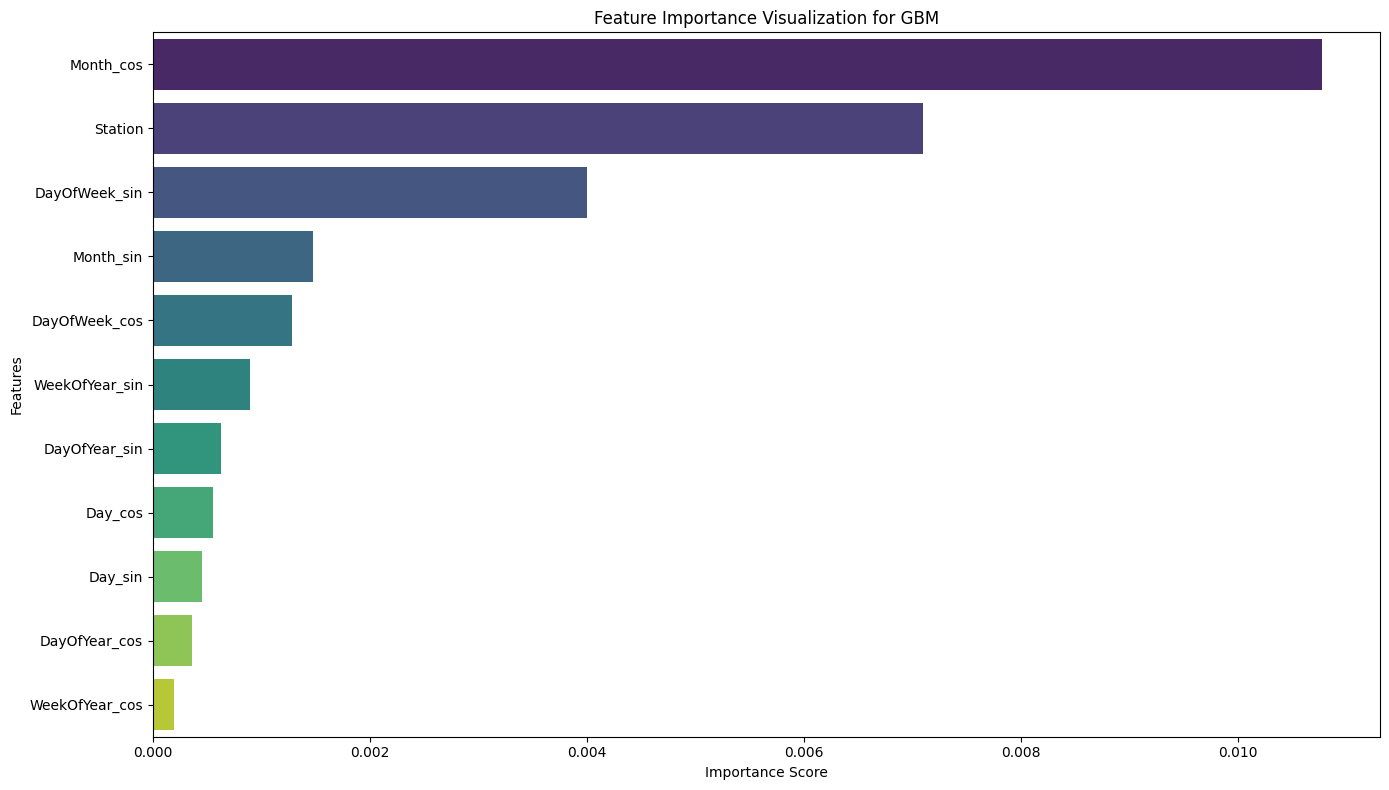

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances_gbm = final_model_gbm.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names_gbm = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                     'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                     'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores and sort them
features_with_importance_gbm = sorted(zip(feature_names_gbm, feature_importances_gbm), key=lambda x: x[1], reverse=True)

# Unzip the sorted features and their importance scores
sorted_features_gbm, sorted_importances_gbm = zip(*features_with_importance_gbm)

# Convert to lists if not already
sorted_importances_gbm = list(sorted_importances_gbm)
sorted_features_gbm = list(sorted_features_gbm)

# Plotting the feature importances using sns.barplot
plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_importances_gbm, y=sorted_features_gbm, palette="viridis")

# Adding labels and title
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Visualization for GBM')
plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you want the top 5 features
top_features_gbm = ['DayOfWeek_cos', 'DayOfWeek_sin', 'Station', 'Month_sin', 'Month_cos']

# Filter the DataFrame
df_filtered_gbm = df_aggregated_with_cyclic[top_features_gbm + ['TransactionVolume']]

# Create sequences with filtered features for GBM
X_gbm, y_gbm = create_sequences_gbm(df_filtered_gbm, sequence_length)

# Split data
train_X_gbm, temp_X_gbm, train_y_gbm, temp_y_gbm = train_test_split(X_gbm, y_gbm, test_size=0.4, random_state=42)
val_X_gbm, test_X_gbm, val_y_gbm, test_y_gbm = train_test_split(temp_X_gbm, temp_y_gbm, test_size=0.5, random_state=42)

# Train the Gradient Boosting model with top features
final_model_gbm = GradientBoostingRegressor(**best_params_gbm)
final_model_gbm.fit(train_X_gbm, train_y_gbm)

# Step 4: Evaluate the Final Model
# For validation set
val_pred_gbm = final_model_gbm.predict(val_X_gbm)
val_mse_gbm = mean_squared_error(val_y_gbm, val_pred_gbm)
val_rmse_gbm = np.sqrt(val_mse_gbm)
val_mae_gbm = mean_absolute_error(val_y_gbm, val_pred_gbm)
val_r2_gbm = r2_score(val_y_gbm, val_pred_gbm)

print('Validation Set (Gradient Boosting Machine):')
print(f"Validation MSE: {val_mse_gbm}")
print(f"Validation RMSE: {val_rmse_gbm}")
print(f"Validation MAE: {val_mae_gbm}")
print(f"Validation R2: {val_r2_gbm}")

# For test set
test_pred_gbm = final_model_gbm.predict(test_X_gbm)
test_mse_gbm = mean_squared_error(test_y_gbm, test_pred_gbm)
test_rmse_gbm = np.sqrt(test_mse_gbm)
test_mae_gbm = mean_absolute_error(test_y_gbm, test_pred_gbm)
test_r2_gbm = r2_score(test_y_gbm, test_pred_gbm)

print('Test Set (Gradient Boosting Machine):')
print(f"Test MSE: {test_mse_gbm}")
print(f"Test RMSE: {test_rmse_gbm}")
print(f"Test MAE: {test_mae_gbm}")
print(f"Test R2: {test_r2_gbm}")


Validation Set (Gradient Boosting Machine):
Validation MSE: 6276687.461514307
Validation RMSE: 2505.3318066703873
Validation MAE: 1635.3059248053394
Validation R2: 0.8996893121373584
Test Set (Gradient Boosting Machine):
Test MSE: 6698093.8090321375
Test RMSE: 2588.067582006339
Test MAE: 1679.0731905610803
Test R2: 0.900419503159708


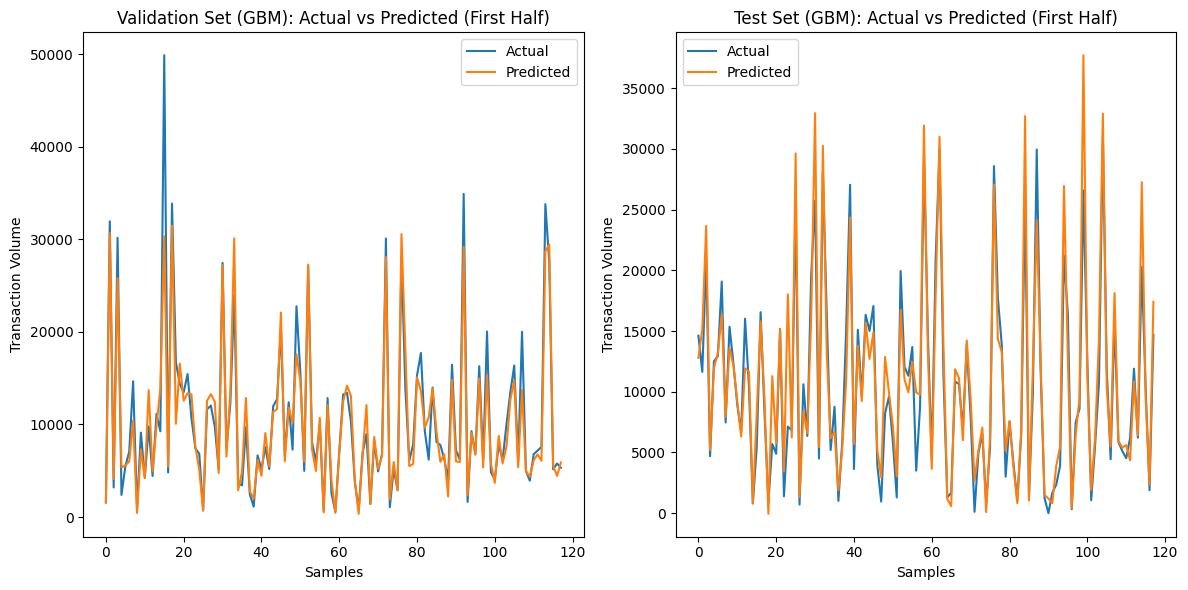

In [34]:
import matplotlib.pyplot as plt

# Step 5: Plot Predictions vs Actual for LightGBM
plt.figure(figsize=(12, 6))

# Plot Validation Predictions vs Actual (First Half) for GBM
plt.subplot(1, 2, 1)
plt.plot(val_y_gbm[:len(val_y_gbm)//15], label='Actual')
plt.plot(val_pred_gbm[:len(val_pred_gbm)//15], label='Predicted')
plt.title('Validation Set (GBM): Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

# Plot Test Predictions vs Actual (First Half) for GBM
plt.subplot(1, 2, 2)
plt.plot(test_y_gbm[:len(test_y_gbm)//15], label='Actual')
plt.plot(test_pred_gbm[:len(test_pred_gbm)//15], label='Predicted')
plt.title('Test Set (GBM): Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example of predicting a future date using LightGBM
station_id = 1  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-07-09')  # The future date you want to predict

# Calculate the cyclic features for the future date
future_data_gbm = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_sin': np.sin(2 * np.pi * prediction_date.day / 31),
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
}

# Create a sequence by repeating the same features for the required sequence length
sequence_length = 30  # Update this to match your sequence length during training
future_sequence_gbm = pd.DataFrame([future_data_gbm] * sequence_length)

# Flatten and reshape to match the model input format
input_sequence_gbm = future_sequence_gbm.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using LightGBM
predicted_volume_gbm = final_model_gbm.predict(input_sequence_gbm)

print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (GBM): {predicted_volume_gbm[0]}")


Predicted Transaction Volume for Station 1 on 2024-07-09 (GBM): 31603.53838092017


## Decision Tree

In [35]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import optuna

sequence_length = 30

# If you're not clustering, use the entire dataset
clusters = df_aggregated_with_cyclic['Cluster'].unique()
clustered_data_dt = {}
for cluster in clusters:
    clustered_data_dt[cluster] = df_aggregated_with_cyclic[df_aggregated_with_cyclic['Cluster'] == cluster]

# Drop the 'DateOnly' column
for cluster, data in clustered_data_dt.items():
    if 'DateOnly' in data.columns:
        data.drop(columns=['DateOnly'], inplace=True)

# Function to create sequences (for time series)
def create_sequences_dt(data, sequence_length, target_column='TransactionVolume'):
    features = data.drop(target_column, axis=1)
    target = data[target_column]

    features = np.array(features)
    target = np.array(target)

    X_dt, y_dt = [], []
    for i in range(len(features) - sequence_length):
        seq = features[i:i + sequence_length, :].flatten()
        X_dt.append(seq)
        y_dt.append(target[i + sequence_length])

    return np.array(X_dt), np.array(y_dt)

# Objective function for Optuna hyperparameter optimization
def objective_dt(trial):
    params_dt = {
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0)
    }

    # Use the entire data if not clustering
    X_dt, y_dt = create_sequences_dt(clustered_data_dt[0], sequence_length)
    train_X_dt, temp_X_dt, train_y_dt, temp_y_dt = train_test_split(X_dt, y_dt, test_size=0.4, random_state=42)
    val_X_dt, test_X_dt, val_y_dt, test_y_dt = train_test_split(temp_X_dt, temp_y_dt, test_size=0.5, random_state=42)

    # Train the model with the suggested hyperparameters
    model_dt = DecisionTreeRegressor(**params_dt)
    model_dt.fit(train_X_dt, train_y_dt)

    # Predict and calculate the validation RMSE
    y_pred_dt = model_dt.predict(val_X_dt)
    val_mse_dt = mean_squared_error(val_y_dt, y_pred_dt)
    val_rmse_dt = np.sqrt(val_mse_dt)

    return val_rmse_dt

# Step 1: Hyperparameter Optimization with Optuna
study_dt = optuna.create_study(direction='minimize')
study_dt.optimize(objective_dt, n_trials=100, n_jobs=-1)

# Step 2: Get the Best Hyperparameters
best_params_dt = study_dt.best_params
print("Best hyperparameters for Decision Tree:", best_params_dt)

# Step 3: Train Final Decision Tree Model with Best Hyperparameters
X_dt, y_dt = create_sequences_dt(clustered_data_dt[0], sequence_length)
train_X_dt, temp_X_dt, train_y_dt, temp_y_dt = train_test_split(X_dt, y_dt, test_size=0.4, random_state=42)
val_X_dt, test_X_dt, val_y_dt, test_y_dt = train_test_split(temp_X_dt, temp_y_dt, test_size=0.5, random_state=42)

final_model_dt = DecisionTreeRegressor(**best_params_dt)
final_model_dt.fit(train_X_dt, train_y_dt)

# Extract feature importances
feature_importances_dt = final_model_dt.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names_dt = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                    'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                    'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores
features_with_importance_dt = sorted(zip(feature_names_dt, feature_importances_dt), key=lambda x: x[1], reverse=True)

# Print the features with their importance scores
print("Decision Tree Feature importances:")
for feature_dt, importance_dt in features_with_importance_dt:
    print(f"{feature_dt}: {importance_dt:.4f}")


[I 2024-09-09 06:12:28,580] A new study created in memory with name: no-name-c54c8b8b-9d32-442a-b69d-a547493bba10
[I 2024-09-09 06:12:30,606] Trial 2 finished with value: 2901.809208588395 and parameters: {'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': 0.22450483751917352}. Best is trial 2 with value: 2901.809208588395.
[I 2024-09-09 06:12:30,645] Trial 3 finished with value: 2786.5953930744527 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.5398091482044328}. Best is trial 3 with value: 2786.5953930744527.
[I 2024-09-09 06:12:31,017] Trial 0 finished with value: 3187.6428890845627 and parameters: {'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.6414076797455227}. Best is trial 3 with value: 2786.5953930744527.
[I 2024-09-09 06:12:31,483] Trial 1 finished with value: 3154.067744312371 and parameters: {'max_depth': 17, 'min_samples_split': 17, 'min_samples_leaf': 5, 'ma

Best hyperparameters for Decision Tree: {'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 0.5602764653855459}
Decision Tree Feature importances:
Station: 0.0015
DayOfYear_sin: 0.0007
Month_sin: 0.0000
Month_cos: 0.0000
Day_sin: 0.0000
Day_cos: 0.0000
DayOfWeek_sin: 0.0000
DayOfWeek_cos: 0.0000
DayOfYear_cos: 0.0000
WeekOfYear_sin: 0.0000
WeekOfYear_cos: 0.0000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


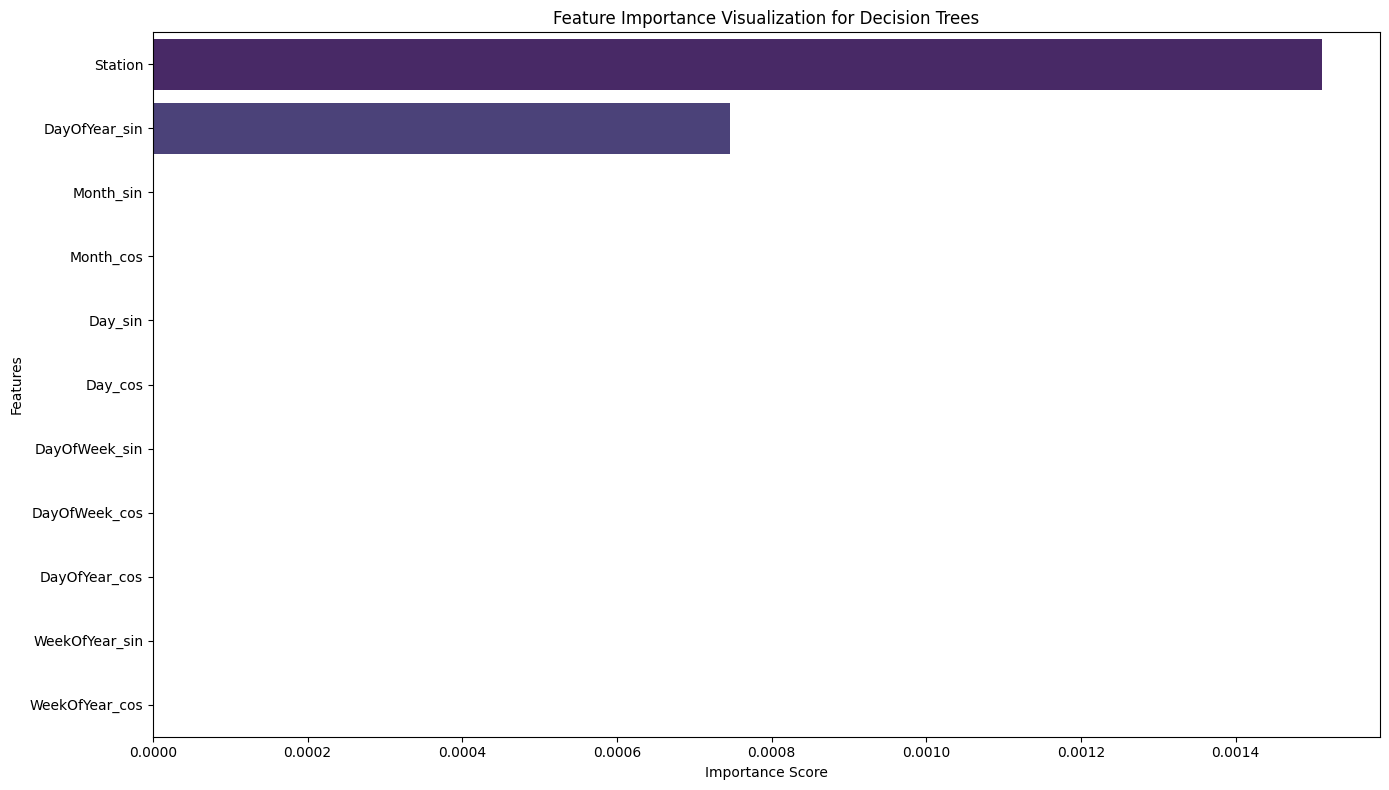

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances_dt = final_model_dt.feature_importances_

# Define feature names (make sure they match the features used in training)
feature_names_dt = ['Station', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                    'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 
                    'WeekOfYear_sin', 'WeekOfYear_cos']

# Pair the feature names with their importance scores and sort them
features_with_importance_dt = sorted(zip(feature_names_dt, feature_importances_dt), key=lambda x: x[1], reverse=True)

# Unzip the sorted features and their importance scores
sorted_features_dt, sorted_importances_dt = zip(*features_with_importance_dt)

# Convert to lists if not already
sorted_importances_dt = list(sorted_importances_dt)
sorted_features_dt = list(sorted_features_dt)

# Plotting the feature importances using sns.barplot
plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_importances_dt, y=sorted_features_dt, palette="viridis")

# Adding labels and title
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Visualization for Decision Trees')
plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Assuming you want the top 5 features
top_features_dt = ['DayOfYear_cos', 'DayOfYear_sin', 'Station', 'Day_sin', 'Month_sin']

# Filter the DataFrame
df_filtered_dt = df_aggregated_with_cyclic[top_features_dt + ['TransactionVolume']]

# Create sequences with filtered features for Decision Tree
X_dt, y_dt = create_sequences_dt(df_filtered_dt, sequence_length)

# Split data
train_X_dt, temp_X_dt, train_y_dt, temp_y_dt = train_test_split(X_dt, y_dt, test_size=0.4, random_state=42)
val_X_dt, test_X_dt, val_y_dt, test_y_dt = train_test_split(temp_X_dt, temp_y_dt, test_size=0.5, random_state=42)

# Train the Decision Tree model with top features
final_model_dt = DecisionTreeRegressor(**best_params_dt)
final_model_dt.fit(train_X_dt, train_y_dt)

# Step 4: Evaluate the Final Model
# For validation set
val_pred_dt = final_model_dt.predict(val_X_dt)
val_mse_dt = mean_squared_error(val_y_dt, val_pred_dt)
val_rmse_dt = np.sqrt(val_mse_dt)
val_mae_dt = mean_absolute_error(val_y_dt, val_pred_dt)
val_r2_dt = r2_score(val_y_dt, val_pred_dt)

print('Validation Set (Decision Tree):')
print(f"Validation MSE: {val_mse_dt}")
print(f"Validation RMSE: {val_rmse_dt}")
print(f"Validation MAE: {val_mae_dt}")
print(f"Validation R2: {val_r2_dt}")

# For test set
test_pred_dt = final_model_dt.predict(test_X_dt)
test_mse_dt = mean_squared_error(test_y_dt, test_pred_dt)
test_rmse_dt = np.sqrt(test_mse_dt)
test_mae_dt = mean_absolute_error(test_y_dt, test_pred_dt)
test_r2_dt = r2_score(test_y_dt, test_pred_dt)

print('Test Set (Decision Tree):')
print(f"Test MSE: {test_mse_dt}")
print(f"Test RMSE: {test_rmse_dt}")
print(f"Test MAE: {test_mae_dt}")
print(f"Test R2: {test_r2_dt}")


Validation Set (Decision Tree):
Validation MSE: 10716066.177103724
Validation RMSE: 3273.540312429912
Validation MAE: 2198.619064278253
Validation R2: 0.8287415175603591
Test Set (Decision Tree):
Test MSE: 11726983.069773456
Test RMSE: 3424.468290081463
Test MAE: 2275.194651705159
Test R2: 0.8256550544348863


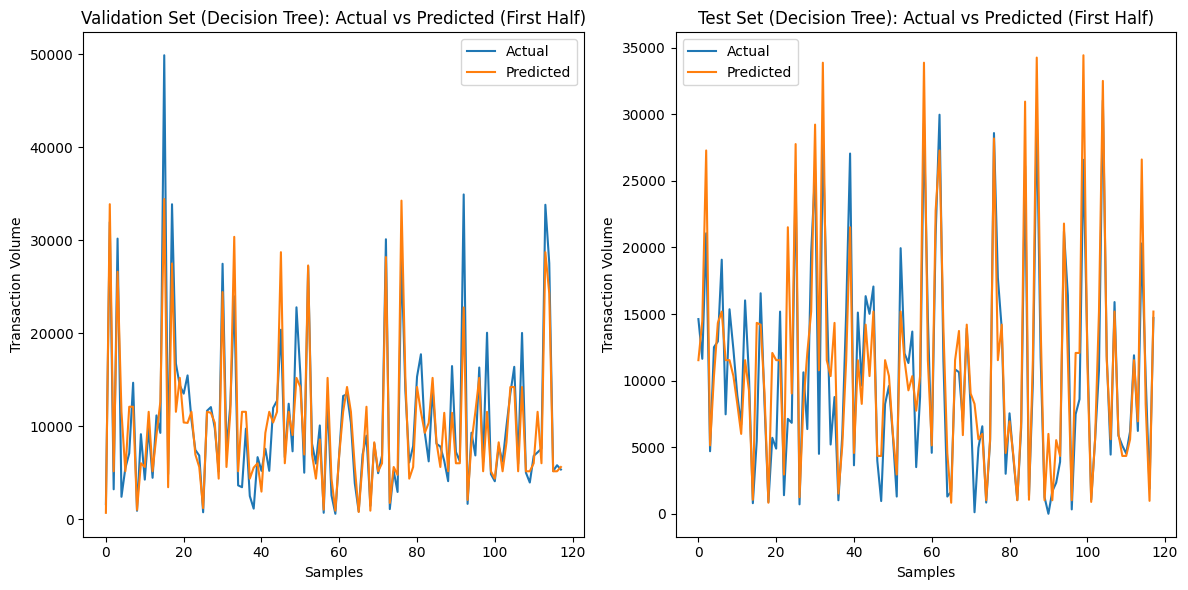

In [38]:
import matplotlib.pyplot as plt

# Step 5: Plot Predictions vs Actual for Decision Tree
plt.figure(figsize=(12, 6))

# Plot Validation Predictions vs Actual (First Half) for Decision Tree
plt.subplot(1, 2, 1)
plt.plot(val_y_dt[:len(val_y_dt)//15], label='Actual')
plt.plot(val_pred_dt[:len(val_pred_dt)//15], label='Predicted')
plt.title('Validation Set (Decision Tree): Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

# Plot Test Predictions vs Actual (First Half) for Decision Tree
plt.subplot(1, 2, 2)
plt.plot(test_y_dt[:len(test_y_dt)//15], label='Actual')
plt.plot(test_pred_dt[:len(test_pred_dt)//15], label='Predicted')
plt.title('Test Set (Decision Tree): Actual vs Predicted (First Half)')
plt.xlabel('Samples')
plt.ylabel('Transaction Volume')
plt.legend()

plt.tight_layout()
plt.show()


In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example of predicting a future date using Decision Tree
station_id = 1  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-07-09')  # The future date you want to predict

# Calculate the cyclic features for the future date
future_data_dt = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_sin': np.sin(2 * np.pi * prediction_date.day / 31),
    'Month_sin': np.sin(2 * np.pi * prediction_date.month / 12),
}

# Create a sequence by repeating the same features for the required sequence length
sequence_length = 30  # Update this to match your sequence length during training
future_sequence_dt = pd.DataFrame([future_data_dt] * sequence_length)

# Flatten and reshape to match the model input format
input_sequence_dt = future_sequence_dt.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using Decision Tree
predicted_volume_dt = final_model_dt.predict(input_sequence_dt)

print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Decision Tree): {predicted_volume_dt[0]}")


Predicted Transaction Volume for Station 1 on 2024-07-09 (Decision Tree): 26080.211875


## Models Comparison

Original Metrics:
            Model           MSE         RMSE          MAE        R²
0         XGBoost  8.857175e+06  2976.100554  2018.923102  0.868320
1   Random Forest  7.837720e+06  2799.592762  1779.844763  0.883477
2             GBM  6.698094e+06  2588.067582  1679.073191  0.900420
3  Decision Trees  1.172698e+07  3424.468290  2275.194652  0.825655
Standardized Metrics:
            Model       MSE      RMSE       MAE        R²
0         XGBoost  0.041384  0.094305  0.350131  0.868320
1   Random Forest -0.505240 -0.478826 -0.687613  0.883477
2             GBM -1.116300 -1.165661 -1.125023  0.900420
3  Decision Trees  1.580156  1.550182  1.462505  0.825655


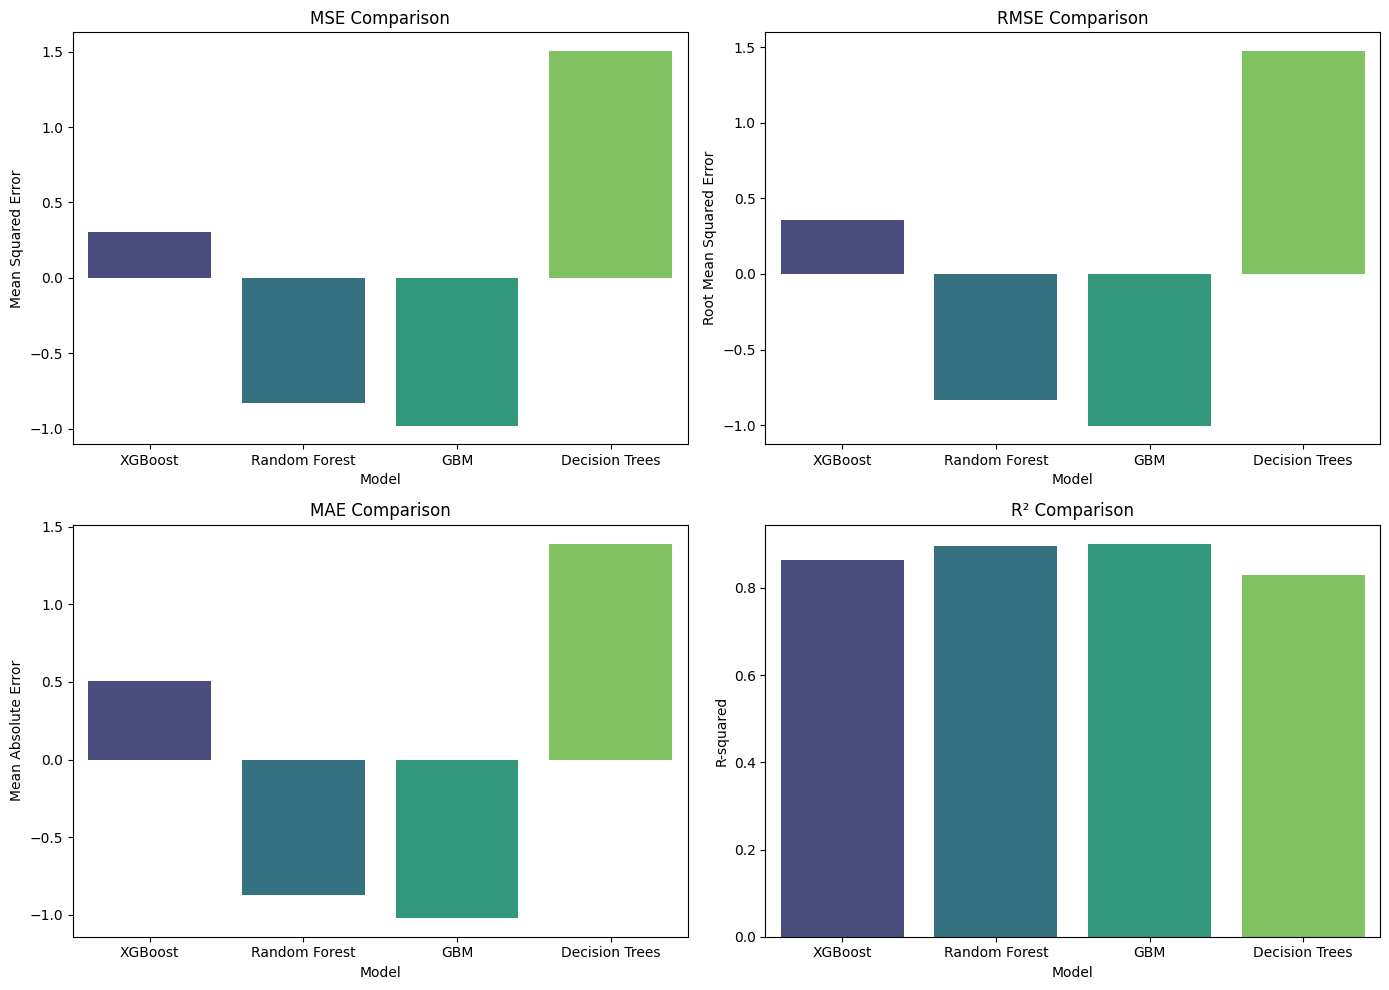

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Organize your metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest', 'GBM', 'Decision Trees'],
    'MSE': [test_mse, test_mse_rf, test_mse_gbm, test_mse_dt],
    'RMSE': [test_rmse, test_rmse_rf, test_rmse_gbm, test_rmse_dt],
    'MAE': [test_mae, test_mae_rf, test_mae_gbm, test_mae_dt],
    'R²': [test_r2, test_r2_rf, test_r2_gbm, test_r2_dt]
})

# Print original metrics
print("Original Metrics:")
print(metrics_df)

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
metrics_standardized = metrics_df.copy()
metrics_standardized[['MSE', 'RMSE', 'MAE']] = scaler.fit_transform(metrics_df[['MSE', 'RMSE', 'MAE']])

# Print the standardized metrics
print("Standardized Metrics:")
print(metrics_standardized)

# Plotting the scaled metrics
plt.figure(figsize=(14, 10))

# Plot MSE
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE', data=metrics_scaled, palette="viridis")
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

# Plot RMSE
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='RMSE', data=metrics_scaled, palette="viridis")
plt.title('RMSE Comparison')
plt.ylabel('Root Mean Squared Error')

# Plot MAE
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE', data=metrics_scaled, palette="viridis")
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')

# Plot R²
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='R²', data=metrics_scaled, palette="viridis")
plt.title('R² Comparison')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


# Prediction Using Both GBM And RF

## Average Model Prediction

In [66]:
import pandas as pd
import numpy as np

# Example of predicting a future date using XGBoost, GBM, Random Forest, and Decision Tree
station_id = 4  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-07-15')  # The future date you want to predict

# Calculate the cyclic features for the future date for XGBoost
future_data_xgb = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
    'Month_cos': np.cos(2 * np.pi * prediction_date.month / 12),
}

# Calculate the cyclic features for the future date for GBM
future_data_gbm = {
    'DayOfWeek_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 7),
    'DayOfWeek_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 7),
    'Station': station_id,
    'Month_sin': np.sin(2 * np.pi * prediction_date.month / 12),
    'Month_cos': np.cos(2 * np.pi * prediction_date.month / 12),
}

# Calculate the cyclic features for the future date for Random Forest
future_data_rf = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_sin': np.sin(2 * np.pi * prediction_date.day / 31),
    'DayOfWeek_cos': np.cos(2 * np.pi * prediction_date.dayofweek / 7),
}

# Calculate the cyclic features for the future date for Decision Tree
future_data_dt = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
    'DayOfWeek_sin': np.sin(2 * np.pi * prediction_date.dayofweek / 7),
}

# Create sequences by repeating the same features for the required sequence length
sequence_length = 30  # Update this to match your sequence length during training
#future_sequence_xgb = pd.DataFrame([future_data_xgb] * sequence_length)
future_sequence_gbm = pd.DataFrame([future_data_gbm] * sequence_length)
future_sequence_rf = pd.DataFrame([future_data_rf] * sequence_length)
#future_sequence_dt = pd.DataFrame([future_data_dt] * sequence_length)

# Flatten and reshape to match the model input format
#input_sequence_xgb = future_sequence_xgb.values.flatten().reshape(1, -1)
input_sequence_gbm = future_sequence_gbm.values.flatten().reshape(1, -1)
input_sequence_rf = future_sequence_rf.values.flatten().reshape(1, -1)
#input_sequence_dt = future_sequence_dt.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using each model
#predicted_volume_xgb = final_model_xgb.predict(input_sequence_xgb)
predicted_volume_gbm = final_model_gbm.predict(input_sequence_gbm)
predicted_volume_rf = final_model_rf.predict(input_sequence_rf)
#predicted_volume_dt = final_model_dt.predict(input_sequence_dt)

# Combine predictions by averaging
average_prediction = (predicted_volume_gbm + predicted_volume_rf) / 2

# Output the predictions
#print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (XGBoost): {predicted_volume_xgb[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (GBM): {predicted_volume_gbm[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Random Forest): {predicted_volume_rf[0]}")
#print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Decision Tree): {predicted_volume_dt[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Averaged): {average_prediction[0]}")


Predicted Transaction Volume for Station 4 on 2024-07-15 (GBM): 6816.062070274776
Predicted Transaction Volume for Station 4 on 2024-07-15 (Random Forest): 4851.050323929463
Predicted Transaction Volume for Station 4 on 2024-07-15 (Averaged): 5833.55619710212


## Weighted Average Model Prediction

In [176]:
import pandas as pd
import numpy as np

# Example of predicting a future date using XGBoost, GBM, Random Forest, and Decision Tree
station_id = 1  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-06-11')  # The future date you want to predict

# Calculate the cyclic features for the future date for XGBoost
future_data_xgb = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'WeekOfYear_sin': np.sin(2 * np.pi * prediction_date.weekofyear / 52),
    'Station': station_id,
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
    'Month_cos': np.cos(2 * np.pi * prediction_date.month / 12),
}

# Calculate the cyclic features for the future date for GBM
future_data_gbm = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_sin': np.sin(2 * np.pi * prediction_date.day / 31),
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
}

# Calculate the cyclic features for the future date for Random Forest
future_data_rf = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_cos': np.cos(2 * np.pi * prediction_date.day / 31),
    'DayOfWeek_cos': np.cos(2 * np.pi * prediction_date.dayofweek / 7),
}

# Calculate the cyclic features for the future date for Decision Tree
future_data_dt = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
    'DayOfWeek_sin': np.sin(2 * np.pi * prediction_date.dayofweek / 7),
}

# Create sequences by repeating the same features for the required sequence length
sequence_length = 30  # Update this to match your sequence length during training
future_sequence_xgb = pd.DataFrame([future_data_xgb] * sequence_length)
future_sequence_gbm = pd.DataFrame([future_data_gbm] * sequence_length)
future_sequence_rf = pd.DataFrame([future_data_rf] * sequence_length)
#future_sequence_dt = pd.DataFrame([future_data_dt] * sequence_length)

# Flatten and reshape to match the model input format
input_sequence_xgb = future_sequence_xgb.values.flatten().reshape(1, -1)
input_sequence_gbm = future_sequence_gbm.values.flatten().reshape(1, -1)
input_sequence_rf = future_sequence_rf.values.flatten().reshape(1, -1)
#input_sequence_dt = future_sequence_dt.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using each model
predicted_volume_xgb = final_model_xgb.predict(input_sequence_xgb)
predicted_volume_gbm = final_model_gbm.predict(input_sequence_gbm)
predicted_volume_rf = final_model_rf.predict(input_sequence_rf)
#predicted_volume_dt = final_model_dt.predict(input_sequence_dt)

# Define weights for the models
#weight_xgb = 0.2  # Weight for XGBoost
weight_gbm = 0.6  # Weight for GBM
weight_rf = 0.4   # Weight for Random Forest
#weight_dt = 0.1   # Weight for Decision Tree

# Combine predictions using weighted averaging
weighted_average_prediction = (
    weight_xgb * predicted_volume_xgb +
    weight_gbm * predicted_volume_gbm +
    weight_rf * predicted_volume_rf 
)

# Output the predictions
#print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (XGBoost): {predicted_volume_xgb[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (GBM): {predicted_volume_gbm[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Random Forest): {predicted_volume_rf[0]}")
#print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Decision Tree): {predicted_volume_dt[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Weighted Average): {weighted_average_prediction[0]}")


Predicted Transaction Volume for Station 1 on 2024-06-11 (XGBoost): 28818.259765625
Predicted Transaction Volume for Station 1 on 2024-06-11 (GBM): 29055.831071138058
Predicted Transaction Volume for Station 1 on 2024-06-11 (Random Forest): 30201.947273890448
Predicted Transaction Volume for Station 1 on 2024-06-11 (Weighted Average): 29466.763193480154


## Ensemble Method with Prediction Corrections

In [177]:
import pandas as pd
import numpy as np

# Define a correction function based on predictions from XGBoost, GBM, and Random Forest
def correction_function(pred_xgb, pred_gbm, pred_rf):
    # Calculate the average difference between XGBoost, GBM, and Random Forest predictions
    avg_difference = (pred_xgb + pred_gbm - 2 * pred_rf) / 2
    # Adjust the Random Forest prediction based on the average difference
    return pred_rf + avg_difference * 0.5

# Example of predicting a future date using XGBoost, GBM, and Random Forest
station_id = 1  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-06-11')  # The future date you want to predict

# Calculate the cyclic features for the future date for XGBoost
future_data_xgb = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'WeekOfYear_sin': np.sin(2 * np.pi * prediction_date.weekofyear / 52),
    'Station': station_id,
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
    'Month_cos': np.cos(2 * np.pi * prediction_date.month / 12),
}

# Create a sequence by repeating the same features for XGBoost
sequence_length = 30  # Update this to match your sequence length during training
future_sequence_xgb = pd.DataFrame([future_data_xgb] * sequence_length)

# Flatten and reshape to match the model input format for XGBoost
input_sequence_xgb = future_sequence_xgb.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using XGBoost
predicted_volume_xgb = final_model_xgb.predict(input_sequence_xgb)

# Calculate the cyclic features for the future date for GBM
future_data_gbm = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_sin': np.sin(2 * np.pi * prediction_date.day / 31),
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
}

# Create a sequence by repeating the same features for GBM
future_sequence_gbm = pd.DataFrame([future_data_gbm] * sequence_length)

# Flatten and reshape to match the model input format for GBM
input_sequence_gbm = future_sequence_gbm.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using GBM
predicted_volume_gbm = final_model_gbm.predict(input_sequence_gbm)

# Calculate the cyclic features for the future date for Random Forest
future_data_rf = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_cos': np.cos(2 * np.pi * prediction_date.day / 31),
    'DayOfWeek_cos': np.cos(2 * np.pi * prediction_date.dayofweek / 7),
}

# Create a sequence by repeating the same features for Random Forest
future_sequence_rf = pd.DataFrame([future_data_rf] * sequence_length)

# Flatten and reshape to match the model input format for Random Forest
input_sequence_rf = future_sequence_rf.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using Random Forest
predicted_volume_rf = final_model_rf.predict(input_sequence_rf)

# Apply the correction function to adjust the Random Forest prediction based on XGBoost and GBM predictions
corrected_prediction_rf = correction_function(predicted_volume_xgb[0], predicted_volume_gbm[0], predicted_volume_rf[0])

print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (XGBoost): {predicted_volume_xgb[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (GBM): {predicted_volume_gbm[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Random Forest): {predicted_volume_rf[0]}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Corrected Random Forest): {corrected_prediction_rf}")


Predicted Transaction Volume for Station 1 on 2024-06-11 (XGBoost): 28818.259765625
Predicted Transaction Volume for Station 1 on 2024-06-11 (GBM): 29055.831071138058
Predicted Transaction Volume for Station 1 on 2024-06-11 (Random Forest): 30201.947273890448
Predicted Transaction Volume for Station 1 on 2024-06-11 (Corrected Random Forest): 29569.496346135988


## Prediction With Min/Max Normalization

not good enough

In [178]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example of predicting a future date using XGBoost, GBM, and Random Forest
station_id = 1  # Replace with the correct station ID
prediction_date = pd.Timestamp('2024-06-11')  # The future date you want to predict

# Calculate the cyclic features for the future date for XGBoost
future_data_xgb = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'WeekOfYear_sin': np.sin(2 * np.pi * prediction_date.weekofyear / 52),
    'Station': station_id,
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
    'Month_cos': np.cos(2 * np.pi * prediction_date.month / 12),
}

# Create a sequence by repeating the same features for XGBoost
sequence_length = 30  # Update this to match your sequence length during training
future_sequence_xgb = pd.DataFrame([future_data_xgb] * sequence_length)

# Flatten and reshape to match the model input format for XGBoost
input_sequence_xgb = future_sequence_xgb.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using XGBoost
predicted_volume_xgb = final_model_xgb.predict(input_sequence_xgb)[0]

# Calculate the cyclic features for the future date for GBM
future_data_gbm = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_sin': np.sin(2 * np.pi * prediction_date.day / 31),
    'WeekOfYear_cos': np.cos(2 * np.pi * prediction_date.weekofyear / 52),
}

# Create a sequence by repeating the same features for GBM
future_sequence_gbm = pd.DataFrame([future_data_gbm] * sequence_length)

# Flatten and reshape to match the model input format for GBM
input_sequence_gbm = future_sequence_gbm.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using GBM
predicted_volume_gbm = final_model_gbm.predict(input_sequence_gbm)[0]

# Calculate the cyclic features for the future date for Random Forest
future_data_rf = {
    'DayOfYear_cos': np.cos(2 * np.pi * prediction_date.dayofyear / 365),
    'DayOfYear_sin': np.sin(2 * np.pi * prediction_date.dayofyear / 365),
    'Station': station_id,
    'Day_cos': np.cos(2 * np.pi * prediction_date.day / 31),
    'DayOfWeek_cos': np.cos(2 * np.pi * prediction_date.dayofweek / 7),
}

# Create a sequence by repeating the same features for Random Forest
future_sequence_rf = pd.DataFrame([future_data_rf] * sequence_length)

# Flatten and reshape to match the model input format for Random Forest
input_sequence_rf = future_sequence_rf.values.flatten().reshape(1, -1)

# Predict the transaction volume for the future date using Random Forest
predicted_volume_rf = final_model_rf.predict(input_sequence_rf)[0]

# Normalize predictions
scaler = MinMaxScaler()

# Reshape predictions to be 2D (for scaler)
predictions_2d = np.array([[predicted_volume_xgb], [predicted_volume_gbm], [predicted_volume_rf]])

# Fit scaler and transform predictions
scaled_predictions = scaler.fit_transform(predictions_2d)

# Average the normalized predictions
average_scaled_prediction = np.mean(scaled_predictions)

# Denormalize the average prediction
# Inverse transform needs original min and max; we'll use min and max of the scaled data
min_pred = np.min(predictions_2d)
max_pred = np.max(predictions_2d)
range_pred = max_pred - min_pred
denormalized_prediction = average_scaled_prediction * range_pred + min_pred

#print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (XGBoost): {predicted_volume_xgb}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (GBM): {predicted_volume_gbm}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Random Forest): {predicted_volume_rf}")
print(f"Predicted Transaction Volume for Station {station_id} on {prediction_date.date()} (Min/Max Normalized Averaged): {denormalized_prediction}")


Predicted Transaction Volume for Station 1 on 2024-06-11 (XGBoost): 28818.259765625
Predicted Transaction Volume for Station 1 on 2024-06-11 (GBM): 29055.831071138058
Predicted Transaction Volume for Station 1 on 2024-06-11 (Random Forest): 30201.947273890448
Predicted Transaction Volume for Station 1 on 2024-06-11 (Min/Max Normalized Averaged): 29358.679370217837
